In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# IMPORT DATA

In [156]:
train_df = pd.read_csv(r"S:\PROJECT\Credit Card Approval- Rejection\train_data.csv")
test_df = pd.read_csv(r"S:\PROJECT\Credit Card Approval- Rejection\test_data.csv")

In [157]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [158]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

# DATA WRANGLING

## Null value Detection and Correction

### Train Null

In [159]:
train_df.isnull().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              9027
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [160]:
test_df.isnull().sum()

ID                        0
Gender                    0
Has a car                 0
Has a property            0
Children count            0
Income                    0
Employment status         0
Education level           0
Marital status            0
Dwelling                  0
Age                       0
Employment length         0
Has a mobile phone        0
Has a work phone          0
Has a phone               0
Has an email              0
Job title              2296
Family member count       0
Account age               0
Is high risk              0
dtype: int64

In [161]:
Train_null= [var for var in train_df.columns if train_df[var].isnull().sum()>0]
Test_null= [var for var in test_df.columns if test_df[var].isnull().sum()>0]

In [162]:
train_df['Job title'].isnull().sum()/train_df['Job title'].shape[0]*100

30.95148294188239

### Test Null

In [163]:
test_df['Job title'].isnull().sum()/test_df['Job title'].shape[0]*100

31.486560614371918

In [164]:
train_null_title = train_df[train_df['Job title'].isna()]
train_null_title.head(2)

ID Gender Has a car Has a property  Children count    Income   
4  5105858      F         N              N               0  270000.0  \
8  5113922      F         N              N               0   90000.0   

  Employment status                Education level        Marital status   
4           Working  Secondary / secondary special             Separated  \
8         Pensioner  Secondary / secondary special  Single / not married   

              Dwelling    Age  Employment length  Has a mobile phone   
4    House / apartment -16207               -515                   1  \
8  Municipal apartment -23478             365243                   1   

   Has a work phone  Has a phone  Has an email Job title  Family member count   
4                 0            1             0       NaN                    1  \
8                 0            0             0       NaN                    1   

   Account age  Is high risk  
4          -41             0  
8          -50             0

In [165]:
test_null_title = test_df[test_df['Job title'].isna()]
test_null_title.head(2)

ID Gender Has a car Has a property  Children count    Income   
6   5029213      F         N              Y               0  180000.0  \
12  5052741      F         N              Y               0   54000.0   

   Employment status                Education level Marital status   
6          Pensioner  Secondary / secondary special        Married  \
12         Pensioner  Secondary / secondary special        Married   

             Dwelling    Age  Employment length  Has a mobile phone   
6   House / apartment -22115             365243                   1  \
12  House / apartment -24367             365243                   1   

    Has a work phone  Has a phone  Has an email Job title   
6                  0            1             0       NaN  \
12                 0            0             0       NaN   

    Family member count  Account age  Is high risk  
6                     2          -23             0  
12                    2           -2             0

In [166]:
train_df = train_df.drop(columns=['Job title'],axis=1)
train_df.columns

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

In [167]:
test_df = test_df.drop(columns=['Job title'],axis=1)
test_df.columns

Index(['ID', 'Gender', 'Has a car', 'Has a property', 'Children count',
       'Income', 'Employment status', 'Education level', 'Marital status',
       'Dwelling', 'Age', 'Employment length', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

In [168]:
train_df.isnull().sum().sum()

0

In [169]:
test_df.isnull().sum().sum()

0

In [170]:
for i in train_df.columns:  
    print(i)
    print('_'*20)
    print(train_df[i].unique())
    print('*'*65)
    print('\n')

ID
____________________
[5037048 5044630 5079079 ... 5047710 5009886 5062632]
*****************************************************************


Gender
____________________
['M' 'F']
*****************************************************************


Has a car
____________________
['Y' 'N']
*****************************************************************


Has a property
____________________
['Y' 'N']
*****************************************************************


Children count
____________________
[ 0  1  2  3  4  5  7 14 19]
*****************************************************************


Income
____________________
[ 135000.   180000.   360000.   270000.   202500.    90000.   306000.
  315000.   157500.   148500.   130500.    45000.   225000.   391500.
  112500.    99000.   207000.   189000.   292500.    81000.   126000.
  234000.   108000.   405000.   166500.   128542.5  540000.   450000.
  121500.   216000.    67500.   211500.   103500.   247500.   265500.
  153000.    7

In [171]:
for i in test_df.columns:  
    print(i)
    print('_'*20)
    print(test_df[i].unique())
    print('*'*65)
    print('\n')

ID
____________________
[5091261 5096963 5087880 ... 5026088 5142701 5022903]
*****************************************************************


Gender
____________________
['F' 'M']
*****************************************************************


Has a car
____________________
['N' 'Y']
*****************************************************************


Has a property
____________________
['Y' 'N']
*****************************************************************


Children count
____________________
[ 0  1  2  3  4  5 14]
*****************************************************************


Income
____________________
[ 202500.   675000.   234000.   445500.   225000.    94500.   180000.
   67500.   189000.   157500.   292500.    54000.   405000.    90000.
  247500.   135000.   171000.    33300.   252000.   256500.   315000.
  562500.   112500.   270000.    99000.   121500.   360000.   306000.
  126000.   103500.   198000.   229500.   220500.   450000.   297000.
  387000.    72000. 

## Age Correction

### Train Age

In [172]:
train_df['Age'].unique()

array([-16271, -10130, -12821, ..., -13532, -18089, -19564], dtype=int64)

In [173]:
train_df['Age'] = train_df['Age']/365
train_df['Age'] = train_df['Age']*(-1)

In [174]:
train_df['Age']= round(train_df['Age'],2)

In [175]:
train_df['Age'].unique()

array([44.58, 27.75, 35.13, ..., 64.53, 47.  , 47.12])

### Test Age

In [176]:
test_df['Age'].unique()

array([-16834, -18126, -21967, ..., -12912,  -9115, -21464], dtype=int64)

In [177]:
test_df['Age'] = test_df['Age']/365
test_df['Age'] = test_df['Age']*(-1)

In [178]:
test_df['Age']= round(test_df['Age'],2)

In [179]:
test_df['Age'].unique()

array([46.12, 49.66, 60.18, ..., 49.44, 28.12, 24.97])

## Employement Length Correction

### Train Employment 

In [180]:
train_df['Employment length'].unique()

array([-3111, -1651, -5657, ..., -1541, -1609, -8256], dtype=int64)

In [181]:
train_df['Employment length'] = train_df['Employment length']/365

In [182]:
train_df['Employment length'].unique()

array([ -8.52328767,  -4.52328767, -15.49863014, ...,  -4.22191781,
        -4.40821918, -22.61917808])

In [183]:
train_employed = train_df[train_df['Employment length']<0]

In [184]:
train_employed['Employment length'] = train_employed['Employment length']*(-1)
train_employed.head(2)

ID Gender Has a car Has a property  Children count    Income   
0  5037048      M         Y              Y               0  135000.0  \
1  5044630      F         Y              N               1  135000.0   

      Employment status                Education level        Marital status   
0               Working  Secondary / secondary special               Married  \
1  Commercial associate               Higher education  Single / not married   

            Dwelling    Age  Employment length  Has a mobile phone   
0       With parents  44.58           8.523288                   1  \
1  House / apartment  27.75           4.523288                   1   

   Has a work phone  Has a phone  Has an email  Family member count   
0                 0            0             0                    2  \
1                 0            0             0                    2   

   Account age  Is high risk  
0          -17             1  
1           -1             0

In [185]:
train_unemployed = train_df[train_df['Employment length']>0]
train_unemployed['Employment length'].unique()

array([1000.66575342])

In [186]:
train_unemployed['Employment length']=0
train_unemployed.head(2)

ID Gender Has a car Has a property  Children count    Income   
8   5113922      F         N              N               0   90000.0  \
10  5061509      F         N              Y               0  202500.0   

   Employment status                Education level        Marital status   
8          Pensioner  Secondary / secondary special  Single / not married  \
10         Pensioner  Secondary / secondary special               Married   

               Dwelling    Age  Employment length  Has a mobile phone   
8   Municipal apartment  64.32                  0                   1  \
10    House / apartment  58.81                  0                   1   

    Has a work phone  Has a phone  Has an email  Family member count   
8                  0            0             0                    1  \
10                 0            0             0                    2   

    Account age  Is high risk  
8           -50             0  
10          -15             0

In [187]:
train_df = pd.concat([train_employed, train_unemployed],axis=0)
train_df.shape

(29165, 19)

In [188]:
train_df['Employment length'] = round(train_df['Employment length'],1)

In [189]:
train_df.head(2)

ID Gender Has a car Has a property  Children count    Income   
0  5037048      M         Y              Y               0  135000.0  \
1  5044630      F         Y              N               1  135000.0   

      Employment status                Education level        Marital status   
0               Working  Secondary / secondary special               Married  \
1  Commercial associate               Higher education  Single / not married   

            Dwelling    Age  Employment length  Has a mobile phone   
0       With parents  44.58                8.5                   1  \
1  House / apartment  27.75                4.5                   1   

   Has a work phone  Has a phone  Has an email  Family member count   
0                 0            0             0                    2  \
1                 0            0             0                    2   

   Account age  Is high risk  
0          -17             1  
1           -1             0

In [190]:
train_df.columns = ['ID','Gender','Has a car','Has a property','Children count','Income',
              'Employment status','Education level','Marital status','Dwelling',
              'Age','Employment length in year','Has a mobile phone','Has a work phone',
              'Has a phone','Has an email','Family member count',
              'Account age','Is high risk']

train_df.head(2)

ID Gender Has a car Has a property  Children count    Income   
0  5037048      M         Y              Y               0  135000.0  \
1  5044630      F         Y              N               1  135000.0   

      Employment status                Education level        Marital status   
0               Working  Secondary / secondary special               Married  \
1  Commercial associate               Higher education  Single / not married   

            Dwelling    Age  Employment length in year  Has a mobile phone   
0       With parents  44.58                        8.5                   1  \
1  House / apartment  27.75                        4.5                   1   

   Has a work phone  Has a phone  Has an email  Family member count   
0                 0            0             0                    2  \
1                 0            0             0                    2   

   Account age  Is high risk  
0          -17             1  
1           -1             0

### Test Employment

In [191]:
test_df['Employment length'].unique()

array([-1692,  -948, -5215, ..., -4387, -1805, -3403], dtype=int64)

In [192]:
test_df['Employment length'] = test_df['Employment length']/365

In [193]:
test_df['Employment length'].unique()

array([ -4.63561644,  -2.59726027, -14.28767123, ..., -12.01917808,
        -4.94520548,  -9.32328767])

In [194]:
test_employed = test_df[test_df['Employment length']<0]

In [195]:
test_employed['Employment length'] = test_employed['Employment length']*(-1)
test_employed.head(2)

ID Gender Has a car Has a property  Children count    Income   
0  5091261      F         N              Y               0  202500.0  \
1  5096963      M         Y              N               0  675000.0   

      Employment status                Education level Marital status   
0         State servant  Secondary / secondary special      Separated  \
1  Commercial associate               Higher education        Married   

            Dwelling    Age  Employment length  Has a mobile phone   
0  House / apartment  46.12           4.635616                   1  \
1  House / apartment  49.66           2.597260                   1   

   Has a work phone  Has a phone  Has an email  Family member count   
0                 0            0             0                    1  \
1                 0            1             0                    2   

   Account age  Is high risk  
0           -6             1  
1          -16             0

In [196]:
test_unemployed = test_df[test_df['Employment length']>0]
test_unemployed['Employment length'].unique()

array([1000.66575342])

In [197]:
test_unemployed['Employment length']=0
test_unemployed.head(2)

ID Gender Has a car Has a property  Children count    Income   
6   5029213      F         N              Y               0  180000.0  \
12  5052741      F         N              Y               0   54000.0   

   Employment status                Education level Marital status   
6          Pensioner  Secondary / secondary special        Married  \
12         Pensioner  Secondary / secondary special        Married   

             Dwelling    Age  Employment length  Has a mobile phone   
6   House / apartment  60.59                  0                   1  \
12  House / apartment  66.76                  0                   1   

    Has a work phone  Has a phone  Has an email  Family member count   
6                  0            1             0                    2  \
12                 0            0             0                    2   

    Account age  Is high risk  
6           -23             0  
12           -2             0

In [198]:
test_df = pd.concat([test_employed, test_unemployed],axis=0)
test_df.shape

(7292, 19)

In [199]:
test_df['Employment length'] = round(test_df['Employment length'],1)

In [200]:
test_df.head(2)

ID Gender Has a car Has a property  Children count    Income   
0  5091261      F         N              Y               0  202500.0  \
1  5096963      M         Y              N               0  675000.0   

      Employment status                Education level Marital status   
0         State servant  Secondary / secondary special      Separated  \
1  Commercial associate               Higher education        Married   

            Dwelling    Age  Employment length  Has a mobile phone   
0  House / apartment  46.12                4.6                   1  \
1  House / apartment  49.66                2.6                   1   

   Has a work phone  Has a phone  Has an email  Family member count   
0                 0            0             0                    1  \
1                 0            1             0                    2   

   Account age  Is high risk  
0           -6             1  
1          -16             0

In [201]:
test_df.columns = ['ID','Gender','Has a car','Has a property','Children count','Income',
              'Employment status','Education level','Marital status','Dwelling',
              'Age','Employment length in year','Has a mobile phone','Has a work phone',
              'Has a phone','Has an email','Family member count',
              'Account age','Is high risk']

test_df.head(2)

ID Gender Has a car Has a property  Children count    Income   
0  5091261      F         N              Y               0  202500.0  \
1  5096963      M         Y              N               0  675000.0   

      Employment status                Education level Marital status   
0         State servant  Secondary / secondary special      Separated  \
1  Commercial associate               Higher education        Married   

            Dwelling    Age  Employment length in year  Has a mobile phone   
0  House / apartment  46.12                        4.6                   1  \
1  House / apartment  49.66                        2.6                   1   

   Has a work phone  Has a phone  Has an email  Family member count   
0                 0            0             0                    1  \
1                 0            1             0                    2   

   Account age  Is high risk  
0           -6             1  
1          -16             0

## Account Age Correction

### Train Account

In [202]:
train_df['Account age'] = train_df['Account age']*(-1)
train_df.head(2)

ID Gender Has a car Has a property  Children count    Income   
0  5037048      M         Y              Y               0  135000.0  \
1  5044630      F         Y              N               1  135000.0   

      Employment status                Education level        Marital status   
0               Working  Secondary / secondary special               Married  \
1  Commercial associate               Higher education  Single / not married   

            Dwelling    Age  Employment length in year  Has a mobile phone   
0       With parents  44.58                        8.5                   1  \
1  House / apartment  27.75                        4.5                   1   

   Has a work phone  Has a phone  Has an email  Family member count   
0                 0            0             0                    2  \
1                 0            0             0                    2   

   Account age  Is high risk  
0           17             1  
1            1             0

### Test Account

In [203]:
test_df['Account age'] = test_df['Account age']*(-1)
test_df.head(2)

ID Gender Has a car Has a property  Children count    Income   
0  5091261      F         N              Y               0  202500.0  \
1  5096963      M         Y              N               0  675000.0   

      Employment status                Education level Marital status   
0         State servant  Secondary / secondary special      Separated  \
1  Commercial associate               Higher education        Married   

            Dwelling    Age  Employment length in year  Has a mobile phone   
0  House / apartment  46.12                        4.6                   1  \
1  House / apartment  49.66                        2.6                   1   

   Has a work phone  Has a phone  Has an email  Family member count   
0                 0            0             0                    1  \
1                 0            1             0                    2   

   Account age  Is high risk  
0            6             1  
1           16             0

## Data Type check and Correction

### Train Data Type

In [204]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29165 entries, 0 to 29163
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         29165 non-null  int64  
 1   Gender                     29165 non-null  object 
 2   Has a car                  29165 non-null  object 
 3   Has a property             29165 non-null  object 
 4   Children count             29165 non-null  int64  
 5   Income                     29165 non-null  float64
 6   Employment status          29165 non-null  object 
 7   Education level            29165 non-null  object 
 8   Marital status             29165 non-null  object 
 9   Dwelling                   29165 non-null  object 
 10  Age                        29165 non-null  float64
 11  Employment length in year  29165 non-null  float64
 12  Has a mobile phone         29165 non-null  int64  
 13  Has a work phone           29165 non-null  int64  


In [205]:
train_df['Family member count'] = train_df['Family member count'].astype(int)

In [206]:
train_df['Age'] = train_df['Age'].astype(int)

In [207]:
train_df['Account age'] = train_df['Account age'].astype(int)

In [208]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29165 entries, 0 to 29163
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         29165 non-null  int64  
 1   Gender                     29165 non-null  object 
 2   Has a car                  29165 non-null  object 
 3   Has a property             29165 non-null  object 
 4   Children count             29165 non-null  int64  
 5   Income                     29165 non-null  float64
 6   Employment status          29165 non-null  object 
 7   Education level            29165 non-null  object 
 8   Marital status             29165 non-null  object 
 9   Dwelling                   29165 non-null  object 
 10  Age                        29165 non-null  int32  
 11  Employment length in year  29165 non-null  float64
 12  Has a mobile phone         29165 non-null  int64  
 13  Has a work phone           29165 non-null  int64  


In [209]:
train_df = train_df.drop(columns=['ID'],axis=1)
train_df.head(2)

Gender Has a car Has a property  Children count    Income   
0      M         Y              Y               0  135000.0  \
1      F         Y              N               1  135000.0   

      Employment status                Education level        Marital status   
0               Working  Secondary / secondary special               Married  \
1  Commercial associate               Higher education  Single / not married   

            Dwelling  Age  Employment length in year  Has a mobile phone   
0       With parents   44                        8.5                   1  \
1  House / apartment   27                        4.5                   1   

   Has a work phone  Has a phone  Has an email  Family member count   
0                 0            0             0                    2  \
1                 0            0             0                    2   

   Account age  Is high risk  
0           17             1  
1            1             0

### Test Data Type

In [210]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7292 entries, 0 to 7286
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         7292 non-null   int64  
 1   Gender                     7292 non-null   object 
 2   Has a car                  7292 non-null   object 
 3   Has a property             7292 non-null   object 
 4   Children count             7292 non-null   int64  
 5   Income                     7292 non-null   float64
 6   Employment status          7292 non-null   object 
 7   Education level            7292 non-null   object 
 8   Marital status             7292 non-null   object 
 9   Dwelling                   7292 non-null   object 
 10  Age                        7292 non-null   float64
 11  Employment length in year  7292 non-null   float64
 12  Has a mobile phone         7292 non-null   int64  
 13  Has a work phone           7292 non-null   int64  
 1

In [211]:
test_df['Family member count'] = test_df['Family member count'].astype(int)

In [212]:
test_df['Age'] = test_df['Age'].astype(int)

In [213]:
test_df['Account age'] = test_df['Account age'].astype(int)

In [214]:
test_df = test_df.drop(columns=['ID'],axis=1)
test_df.head(2)

Gender Has a car Has a property  Children count    Income   
0      F         N              Y               0  202500.0  \
1      M         Y              N               0  675000.0   

      Employment status                Education level Marital status   
0         State servant  Secondary / secondary special      Separated  \
1  Commercial associate               Higher education        Married   

            Dwelling  Age  Employment length in year  Has a mobile phone   
0  House / apartment   46                        4.6                   1  \
1  House / apartment   49                        2.6                   1   

   Has a work phone  Has a phone  Has an email  Family member count   
0                 0            0             0                    1  \
1                 0            1             0                    2   

   Account age  Is high risk  
0            6             1  
1           16             0

# STATISTICAL ANALYSIS

### Train Statistics

In [215]:
train_df.describe()

Children count        Income           Age  Employment length in year   
count    29165.000000  2.916500e+04  29165.000000               29165.000000  \
mean         0.430790  1.868904e+05     43.275090                   6.045657   
std          0.741882  1.014096e+05     11.516975                   6.495149   
min          0.000000  2.700000e+04     21.000000                   0.000000   
25%          0.000000  1.215000e+05     34.000000                   1.100000   
50%          0.000000  1.575000e+05     42.000000                   4.300000   
75%          1.000000  2.250000e+05     53.000000                   8.600000   
max         19.000000  1.575000e+06     68.000000                  43.000000   

       Has a mobile phone  Has a work phone   Has a phone  Has an email   
count             29165.0      29165.000000  29165.000000  29165.000000  \
mean                  1.0          0.224310      0.294977      0.090279   
std                   0.0          0.417134      0.456040      0.286587   
min                   1.0          0.000000      0.000000      0.000000   
25%                   1.0          0.000000      0.000000      0.000000   
50%                   1.0          0.000000      0.000000      0.000000   
75%                   1.0          0.000000      1.000000      0.000000   
max                   1.0          1.000000      1.000000      1.000000   

       Family member count   Account age  Is high risk  
count         29165.000000  29165.000000  29165.000000  
mean              2.197531     26.137734      0.017144  
std               0.912189     16.486702      0.129809  
min               1.000000      0.000000      0.000000  
25%               2.000000     12.000000      0.000000  
50%               2.000000     24.000000      0.000000  
75%               3.000000     39.000000      0.000000  
max              20.000000     60.000000      1.000000

In [216]:
train_numerical_list = train_df.select_dtypes(['int64','float64','int32','float32'])

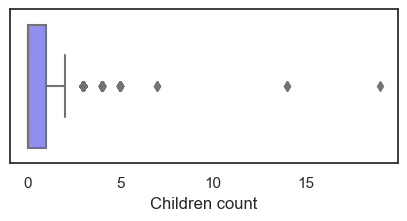

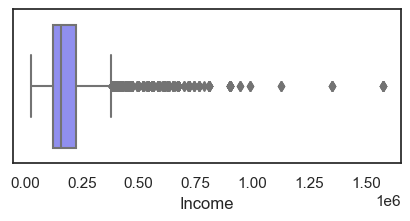

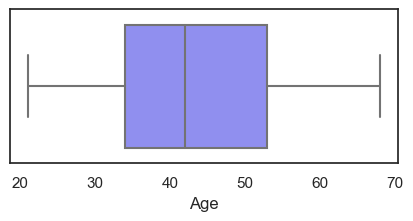

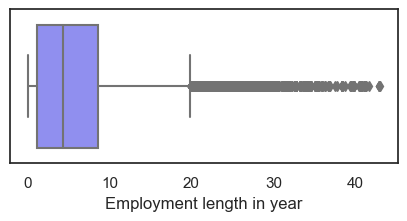

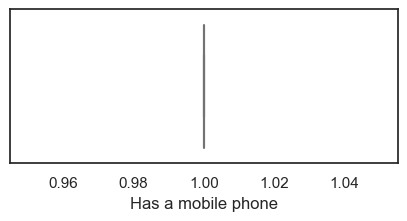

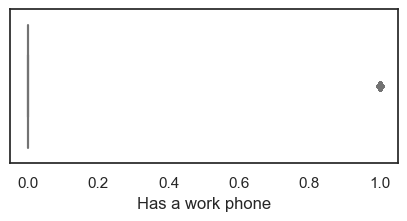

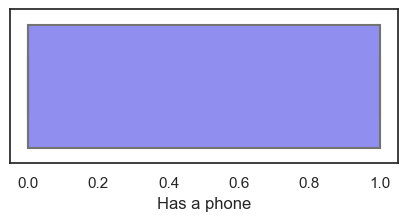

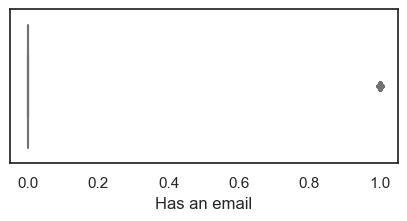

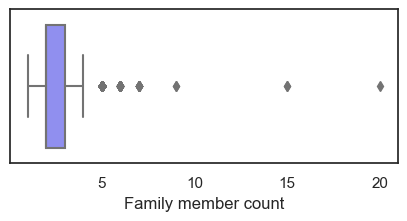

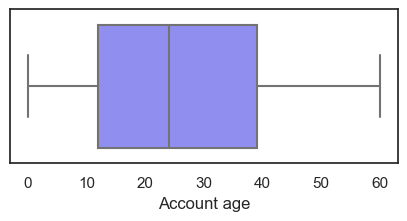

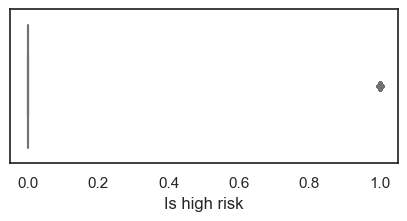

In [217]:
for var in train_numerical_list:
    plt.figure(figsize=(5,2))
    sb.boxplot(x=var,data=train_df,palette='cool')
    plt.show()

### Test Statistics

In [218]:
test_df.describe()

Children count        Income          Age  Employment length in year   
count     7292.000000  7.292000e+03  7292.000000                7292.000000  \
mean         0.428415  1.858672e+05    43.220378                   5.957241   
std          0.744350  1.032964e+05    11.487757                   6.440573   
min          0.000000  2.700000e+04    20.000000                   0.000000   
25%          0.000000  1.170000e+05    34.000000                   1.100000   
50%          0.000000  1.575000e+05    42.000000                   4.200000   
75%          1.000000  2.250000e+05    53.000000                   8.600000   
max         14.000000  1.575000e+06    68.000000                  42.900000   

       Has a mobile phone  Has a work phone  Has a phone  Has an email   
count              7292.0       7292.000000  7292.000000   7292.000000  \
mean                  1.0          0.230389     0.294158      0.087493   
std                   0.0          0.421111     0.455695      0.282576   
min                   1.0          0.000000     0.000000      0.000000   
25%                   1.0          0.000000     0.000000      0.000000   
50%                   1.0          0.000000     0.000000      0.000000   
75%                   1.0          0.000000     1.000000      0.000000   
max                   1.0          1.000000     1.000000      1.000000   

       Family member count  Account age  Is high risk  
count          7292.000000  7292.000000   7292.000000  
mean              2.202139    26.270022      0.016182  
std               0.909726    16.563032      0.126184  
min               1.000000     0.000000      0.000000  
25%               2.000000    12.000000      0.000000  
50%               2.000000    24.000000      0.000000  
75%               3.000000    39.000000      0.000000  
max              15.000000    60.000000      1.000000

In [219]:
test_numerical_list = test_df.select_dtypes(['int64','float64','int32','float32'])

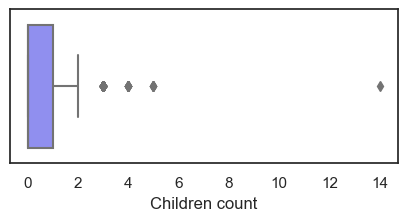

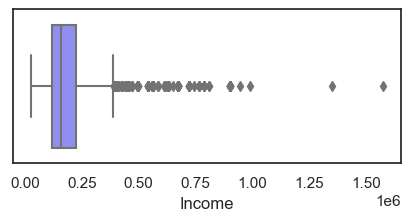

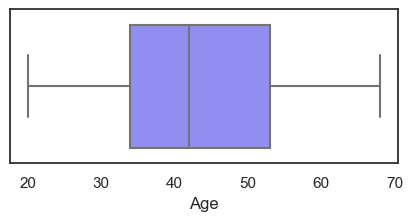

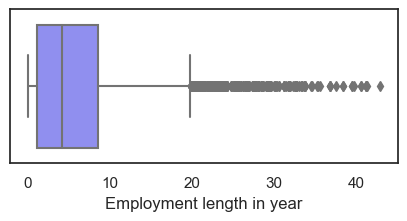

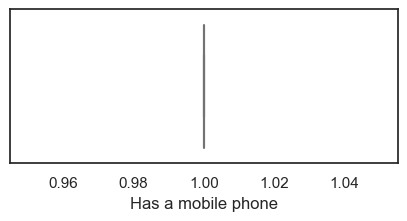

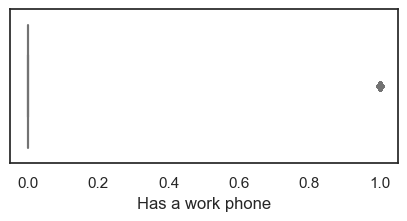

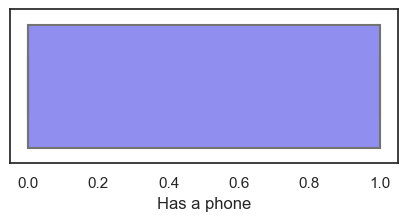

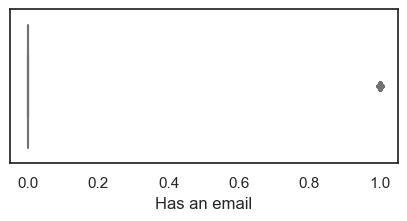

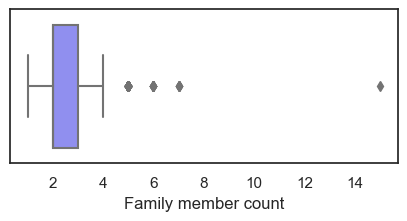

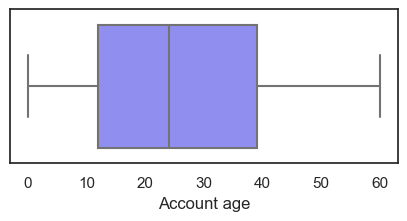

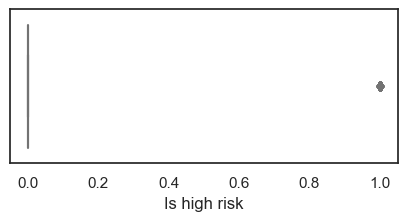

In [220]:
for var in test_numerical_list:
    plt.figure(figsize=(5,2))
    sb.boxplot(x=var,data=test_df,palette='cool')
    plt.show()

# Z-Score Analysis

In [221]:
outliers=[]
def detect_outliers(data):
    threshold=4
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

### Train Z-Score

In [222]:
detect_outliers(train_df['Children count'])

[4,
 4,
 4,
 4,
 4,
 5,
 7,
 14,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 19,
 5,
 5,
 4,
 7,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 5,
 5,
 4,
 5,
 4,
 4,
 14,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 4]

In [223]:
train_df = train_df[train_df['Children count']<5]

In [224]:
detect_outliers(train_df['Family member count'])

[4,
 4,
 4,
 4,
 4,
 5,
 7,
 14,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 19,
 5,
 5,
 4,
 7,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 5,
 5,
 4,
 5,
 4,
 4,
 14,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6]

In [225]:
train_df = train_df[train_df['Family member count']<7]

In [226]:
train_df = train_df[train_df['Income']<600000]

In [227]:
train_df.shape

(28913, 18)

### Test Z-Score

In [228]:
detect_outliers(test_df['Children count'])

[4,
 4,
 4,
 4,
 4,
 5,
 7,
 14,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 19,
 5,
 5,
 4,
 7,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 5,
 5,
 4,
 5,
 4,
 4,
 14,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 14,
 5,
 4,
 5,
 5,
 4,
 4,
 4]

In [229]:
test_df = test_df[test_df['Children count']<5]

In [230]:
detect_outliers(test_df['Family member count'])

[4,
 4,
 4,
 4,
 4,
 5,
 7,
 14,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 5,
 4,
 4,
 4,
 4,
 19,
 5,
 5,
 4,
 7,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 5,
 5,
 4,
 5,
 4,
 4,
 14,
 4,
 4,
 5,
 4,
 4,
 5,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 5,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 14,
 5,
 4,
 5,
 5,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6]

In [231]:
test_df = test_df[test_df['Family member count']<7]

In [232]:
test_df = test_df[test_df['Income']<600000]

In [233]:
test_df.shape

(7212, 18)

# Exploratory Data Analysis

In [234]:
train_df.columns

Index(['Gender', 'Has a car', 'Has a property', 'Children count', 'Income',
       'Employment status', 'Education level', 'Marital status', 'Dwelling',
       'Age', 'Employment length in year', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

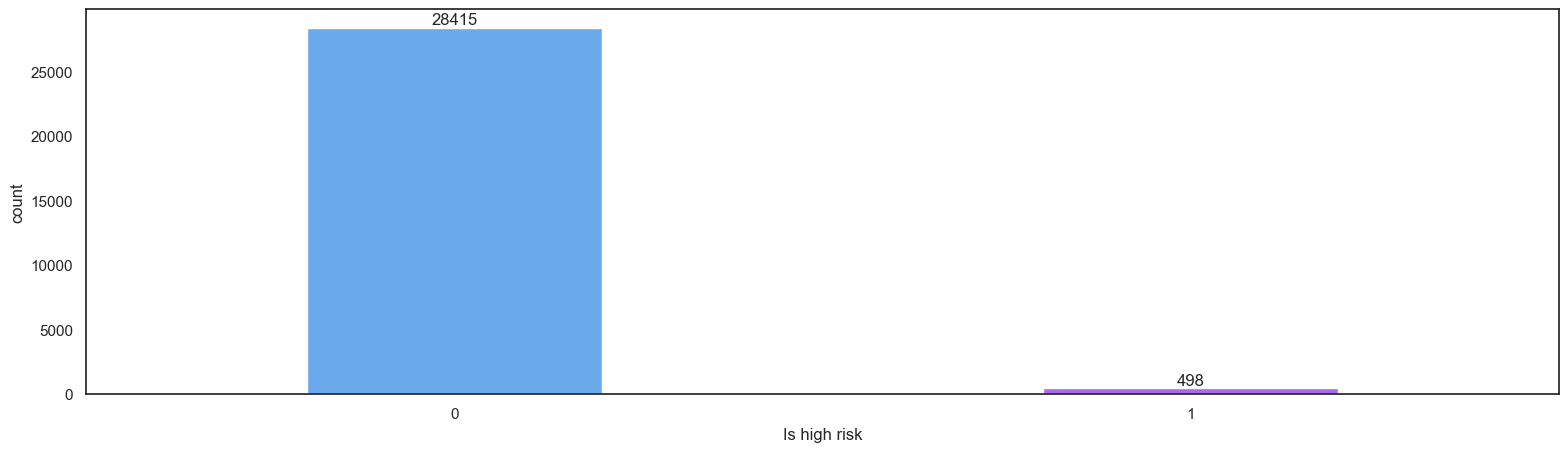

In [235]:
plt.figure(figsize=(19,5))

a= sb.countplot(x='Is high risk',data=train_df,palette='cool',width=0.4)
for i in a.containers:
    a.bar_label(i)

plt.show()

## Creating Year Feature

In [236]:
train_df['Year'] = train_df['Account age'].copy()

In [237]:
train_df.loc[(train_df['Account age'] >=0) & (train_df['Account age'] <= 1),  'Year'] = '2024' 
train_df.loc[(train_df['Account age'] >1)  & (train_df['Account age'] <= 2),  'Year'] = '2023'

train_df.loc[(train_df['Account age'] >2)  & (train_df['Account age'] <= 3),  'Year'] = '2022' 
train_df.loc[(train_df['Account age'] >3)  & (train_df['Account age'] <= 4),  'Year'] = '2021' 

train_df.loc[(train_df['Account age'] >4)  & (train_df['Account age'] <= 5),  'Year'] = '2020' 
train_df.loc[(train_df['Account age'] >5)  & (train_df['Account age'] <= 6),  'Year'] = '2019' 

train_df.loc[(train_df['Account age'] >6)  & (train_df['Account age'] <= 7),  'Year'] = '2018' 
train_df.loc[(train_df['Account age'] >7)  & (train_df['Account age'] <= 8),  'Year'] = '2017' 

train_df.loc[(train_df['Account age'] >8)  & (train_df['Account age'] <= 9),  'Year'] = '2016' 
train_df.loc[(train_df['Account age'] >9)  & (train_df['Account age'] <= 10), 'Year'] = '2015' 

train_df.loc[(train_df['Account age'] >10) & (train_df['Account age'] <= 11), 'Year'] = '2014' 
train_df.loc[(train_df['Account age'] >11) & (train_df['Account age'] <= 12), 'Year'] = '2013'

train_df.loc[(train_df['Account age'] >12) & (train_df['Account age'] <= 13), 'Year'] = '2012' 
train_df.loc[(train_df['Account age'] >13) & (train_df['Account age'] <= 14), 'Year'] = '2011' 

train_df.loc[(train_df['Account age'] >14) & (train_df['Account age'] <= 15), 'Year'] = '2010' 
train_df.loc[(train_df['Account age'] >15) & (train_df['Account age'] <= 16), 'Year'] = '2009' 

train_df.loc[(train_df['Account age'] >16) & (train_df['Account age'] <= 17), 'Year'] = '2008' 
train_df.loc[(train_df['Account age'] >17) & (train_df['Account age'] <= 18), 'Year'] = '2007' 

train_df.loc[(train_df['Account age'] >18) & (train_df['Account age'] <= 19), 'Year'] = '2006' 
train_df.loc[(train_df['Account age'] >19) & (train_df['Account age'] <= 20), 'Year'] = '2005' 

train_df.loc[(train_df['Account age'] >20) & (train_df['Account age'] <= 21), 'Year'] = '2004' 
train_df.loc[(train_df['Account age'] >21) & (train_df['Account age'] <= 22), 'Year'] = '2003'

train_df.loc[(train_df['Account age'] >22) & (train_df['Account age'] <= 23), 'Year'] = '2002' 
train_df.loc[(train_df['Account age'] >23) & (train_df['Account age'] <= 24), 'Year'] = '2001' 

train_df.loc[(train_df['Account age'] >24) & (train_df['Account age'] <= 25), 'Year'] = '2000' 
train_df.loc[(train_df['Account age'] >25) & (train_df['Account age'] <= 26), 'Year'] = '1999' 

train_df.loc[(train_df['Account age'] >26) & (train_df['Account age'] <= 27), 'Year'] = '1998' 
train_df.loc[(train_df['Account age'] >27) & (train_df['Account age'] <= 28), 'Year'] = '1997' 

train_df.loc[(train_df['Account age'] >28) & (train_df['Account age'] <= 29), 'Year'] = '1996' 
train_df.loc[(train_df['Account age'] >29) & (train_df['Account age'] <= 30), 'Year'] = '1995' 

train_df.loc[(train_df['Account age'] >30) & (train_df['Account age'] <= 31), 'Year'] = '1994' 
train_df.loc[(train_df['Account age'] >31) & (train_df['Account age'] <= 32), 'Year'] = '1993'

train_df.loc[(train_df['Account age'] >32) & (train_df['Account age'] <= 33), 'Year'] = '1992' 
train_df.loc[(train_df['Account age'] >33) & (train_df['Account age'] <= 34), 'Year'] = '1991' 

train_df.loc[(train_df['Account age'] >34) & (train_df['Account age'] <= 35), 'Year'] = '1990' 
train_df.loc[(train_df['Account age'] >35) & (train_df['Account age'] <= 36), 'Year'] = '1989' 

train_df.loc[(train_df['Account age'] >36) & (train_df['Account age'] <= 37), 'Year'] = '1988' 
train_df.loc[(train_df['Account age'] >37) & (train_df['Account age'] <= 38), 'Year'] = '1987' 

train_df.loc[(train_df['Account age'] >38) & (train_df['Account age'] <= 39), 'Year'] = '1986' 
train_df.loc[(train_df['Account age'] >39) & (train_df['Account age'] <= 40), 'Year'] = '1985' 

train_df.loc[(train_df['Account age'] >40) & (train_df['Account age'] <= 41), 'Year'] = '1984' 
train_df.loc[(train_df['Account age'] >41) & (train_df['Account age'] <= 42), 'Year'] = '1983'

train_df.loc[(train_df['Account age'] >42) & (train_df['Account age'] <= 43), 'Year'] = '1982' 
train_df.loc[(train_df['Account age'] >43) & (train_df['Account age'] <= 44), 'Year'] = '1981' 

train_df.loc[(train_df['Account age'] >44) & (train_df['Account age'] <= 45), 'Year'] = '1996' 
train_df.loc[(train_df['Account age'] >45) & (train_df['Account age'] <= 46), 'Year'] = '1995' 

train_df.loc[(train_df['Account age'] >46) & (train_df['Account age'] <= 47), 'Year'] = '1994' 
train_df.loc[(train_df['Account age'] >47) & (train_df['Account age'] <= 48), 'Year'] = '1993'

train_df.loc[(train_df['Account age'] >48) & (train_df['Account age'] <= 49), 'Year'] = '1992' 
train_df.loc[(train_df['Account age'] >49) & (train_df['Account age'] <= 50), 'Year'] = '1991' 

train_df.loc[(train_df['Account age'] >50) & (train_df['Account age'] <= 51), 'Year'] = '1990' 
train_df.loc[(train_df['Account age'] >51) & (train_df['Account age'] <= 52), 'Year'] = '1989' 

train_df.loc[(train_df['Account age'] >52) & (train_df['Account age'] <= 53), 'Year'] = '1988' 
train_df.loc[(train_df['Account age'] >53) & (train_df['Account age'] <= 54), 'Year'] = '1987' 

train_df.loc[(train_df['Account age'] >54) & (train_df['Account age'] <= 55), 'Year'] = '1986' 
train_df.loc[(train_df['Account age'] >39) & (train_df['Account age'] <= 56), 'Year'] = '1985' 

train_df.loc[(train_df['Account age'] >55) & (train_df['Account age'] <= 57), 'Year'] = '1984' 
train_df.loc[(train_df['Account age'] >56) & (train_df['Account age'] <= 58), 'Year'] = '1983'

train_df.loc[(train_df['Account age'] >57) & (train_df['Account age'] <= 59), 'Year'] = '1982' 
train_df.loc[(train_df['Account age'] >58) & (train_df['Account age'] <= 60), 'Year'] = '1981' 

In [238]:
train_df['Year'].unique()

array(['2008', '2024', '1987', '2014', '1985', '2009', '2004', '2012',
       '2019', '2010', '2002', '2011', '1992', '2007', '2001', '1991',
       '2013', '2003', '1981', '1994', '1982', '1995', '1999', '1996',
       '1984', '1989', '2017', '2000', '1990', '2023', '2016', '2022',
       '2005', '1997', '1993', '2021', '1988', '2020', '2015', '1986',
       '2018', '1998', '2006', '1983'], dtype=object)

In [239]:
train_df.head(2)

Gender Has a car Has a property  Children count    Income   
0      M         Y              Y               0  135000.0  \
1      F         Y              N               1  135000.0   

      Employment status                Education level        Marital status   
0               Working  Secondary / secondary special               Married  \
1  Commercial associate               Higher education  Single / not married   

            Dwelling  Age  Employment length in year  Has a mobile phone   
0       With parents   44                        8.5                   1  \
1  House / apartment   27                        4.5                   1   

   Has a work phone  Has a phone  Has an email  Family member count   
0                 0            0             0                    2  \
1                 0            0             0                    2   

   Account age  Is high risk  Year  
0           17             1  2008  
1            1             0  2024

## Time Series Analysis

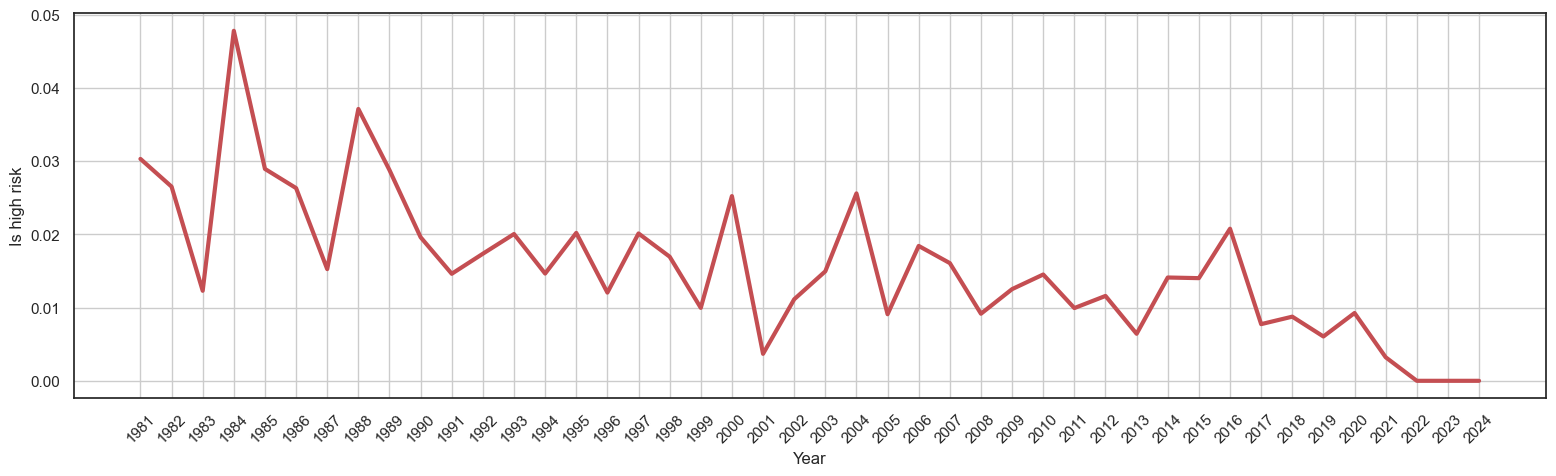

In [240]:
plt.figure(figsize=(19,5))
a = train_df.groupby('Year',as_index=False)['Is high risk'].mean()
b = sb.lineplot(x='Year',y='Is high risk',data=a,palette='autumn',color='r',linewidth=3)
for i in b.containers:
    b.bar_label(i)
plt.xticks(rotation=45)
plt.grid()
plt.show()

In 1984 the most risky credit card applicant existed.

In [241]:
df_1984 = train_df[train_df['Year']=='1984']
df_1984.shape

(272, 19)

Gender
F    70.0
M    30.0
Name: proportion, dtype: float64 0


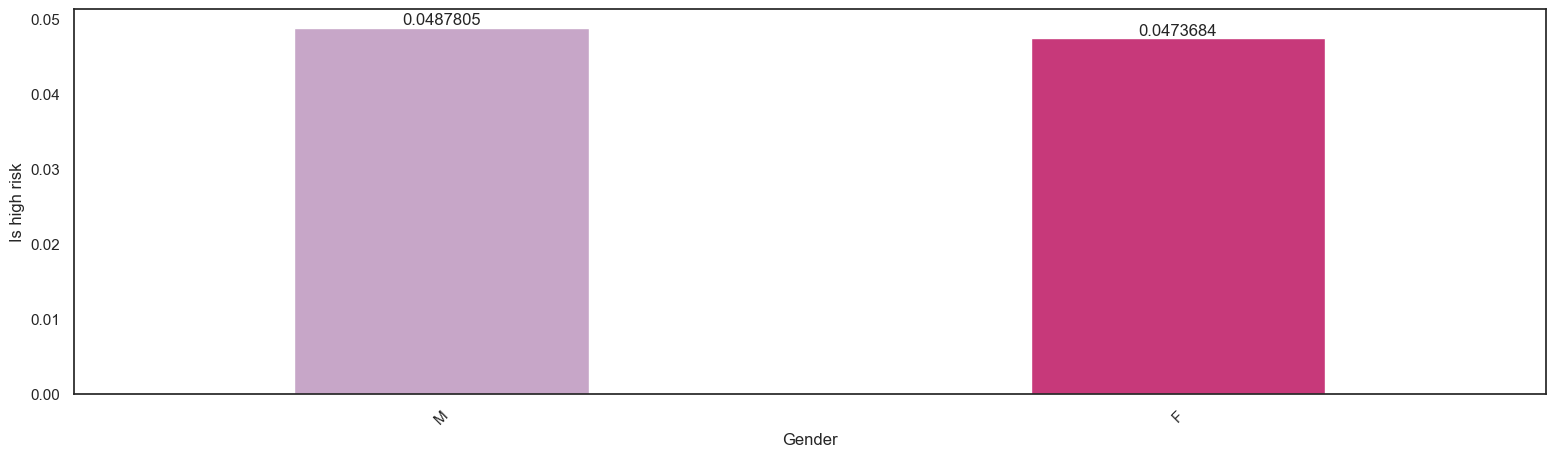

Has a car
N    61.0
Y    39.0
Name: proportion, dtype: float64 0


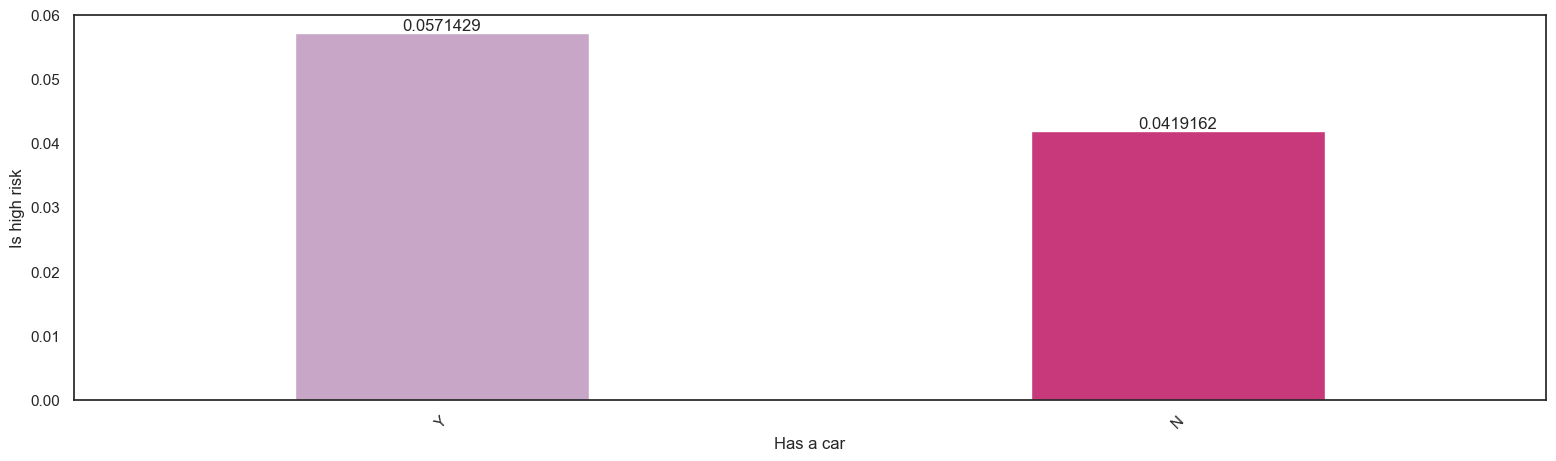

Has a property
Y    72.0
N    28.0
Name: proportion, dtype: float64 0


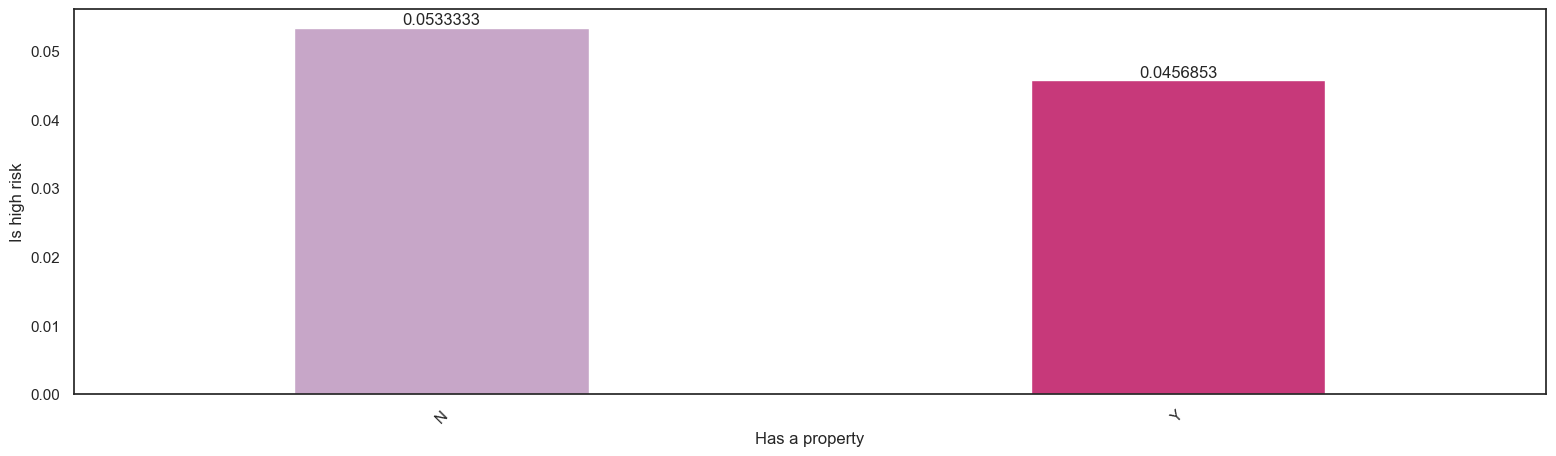

Children count
0    72.0
1    16.0
2    11.0
3     1.0
Name: proportion, dtype: float64 0


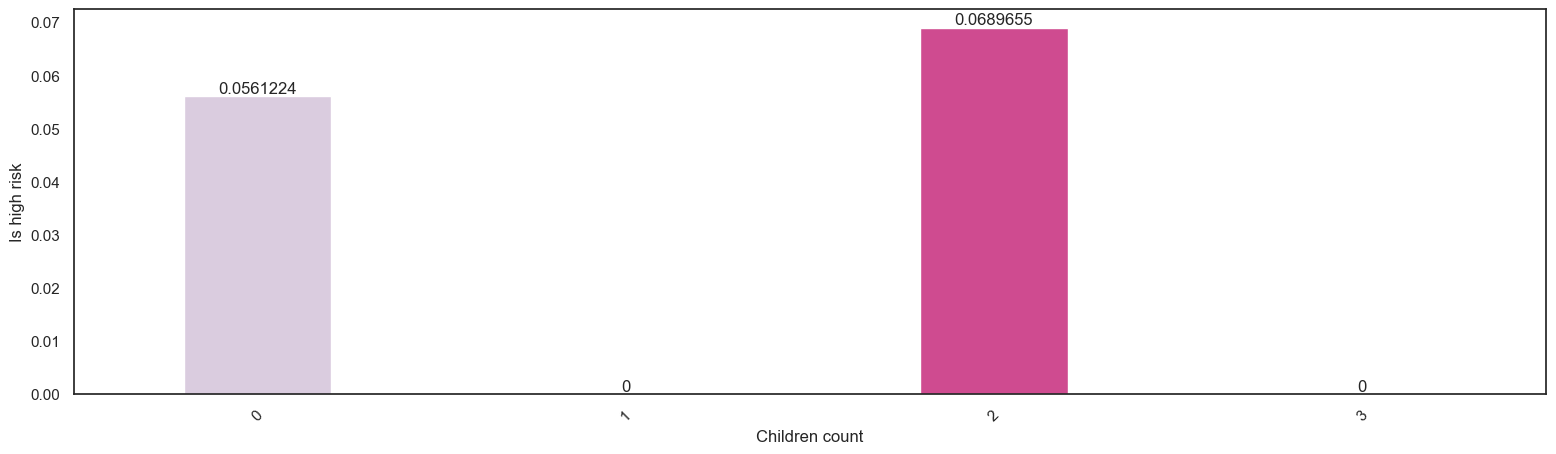

Income
225000.0    10.0
135000.0    10.0
202500.0     9.0
112500.0     9.0
157500.0     7.0
180000.0     7.0
270000.0     6.0
247500.0     4.0
90000.0      4.0
67500.0      3.0
450000.0     3.0
315000.0     3.0
360000.0     2.0
292500.0     2.0
108000.0     2.0
81000.0      2.0
144000.0     1.0
94500.0      1.0
121500.0     1.0
171000.0     1.0
40500.0      1.0
211500.0     1.0
126000.0     1.0
54000.0      1.0
76500.0      1.0
139500.0     0.0
220500.0     0.0
337500.0     0.0
207000.0     0.0
324000.0     0.0
115290.0     0.0
85500.0      0.0
58500.0      0.0
117000.0     0.0
252000.0     0.0
540000.0     0.0
99000.0      0.0
130500.0     0.0
175500.0     0.0
427500.0     0.0
234000.0     0.0
153000.0     0.0
166500.0     0.0
148500.0     0.0
463500.0     0.0
387000.0     0.0
189000.0     0.0
254700.0     0.0
103500.0     0.0
162000.0     0.0
Name: proportion, dtype: float64 0


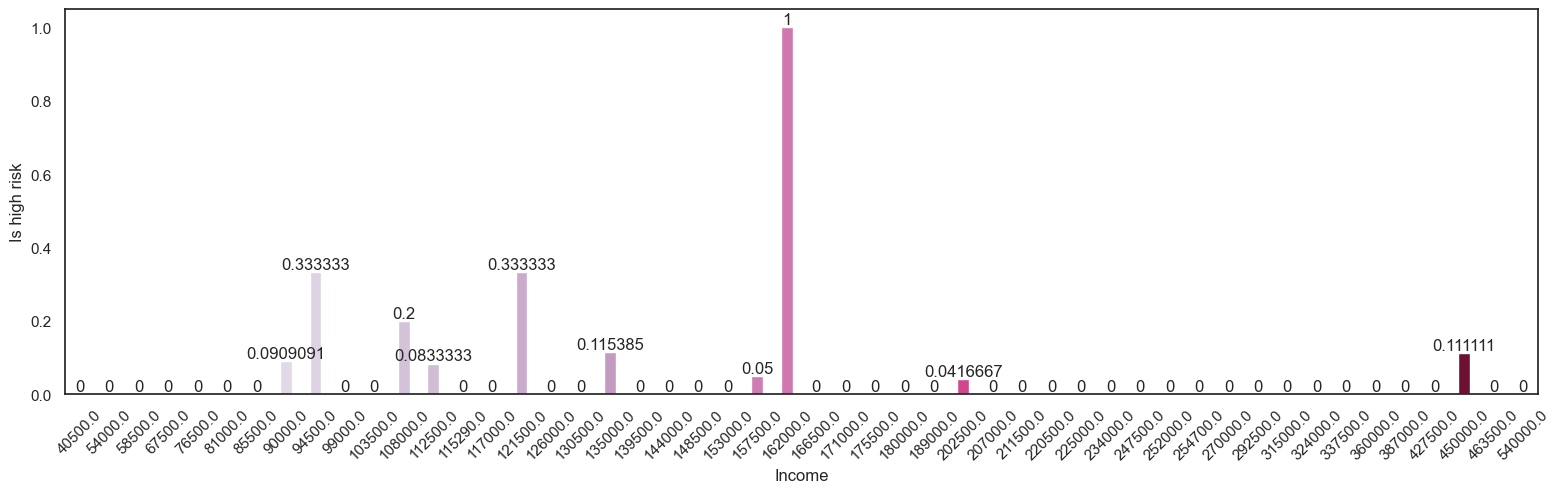

Employment status
Working                 55.0
Commercial associate    21.0
Pensioner               17.0
State servant            7.0
Name: proportion, dtype: float64 0


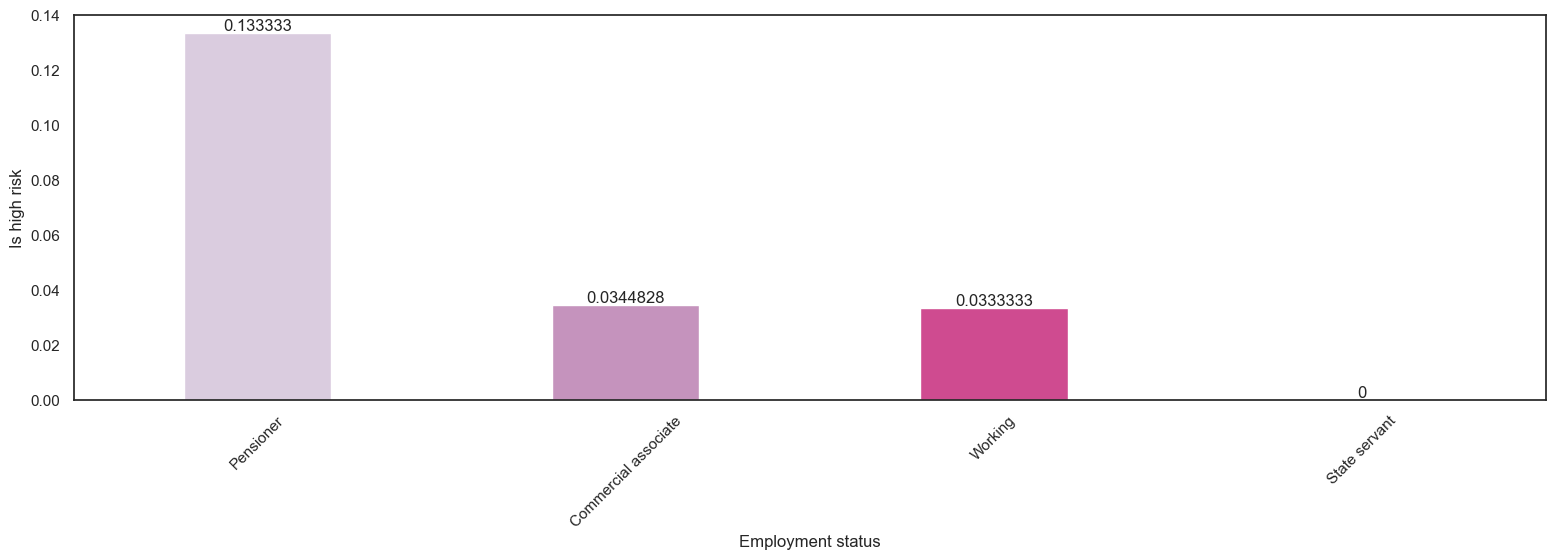

Education level
Secondary / secondary special    71.0
Higher education                 24.0
Incomplete higher                 3.0
Lower secondary                   2.0
Name: proportion, dtype: float64 0


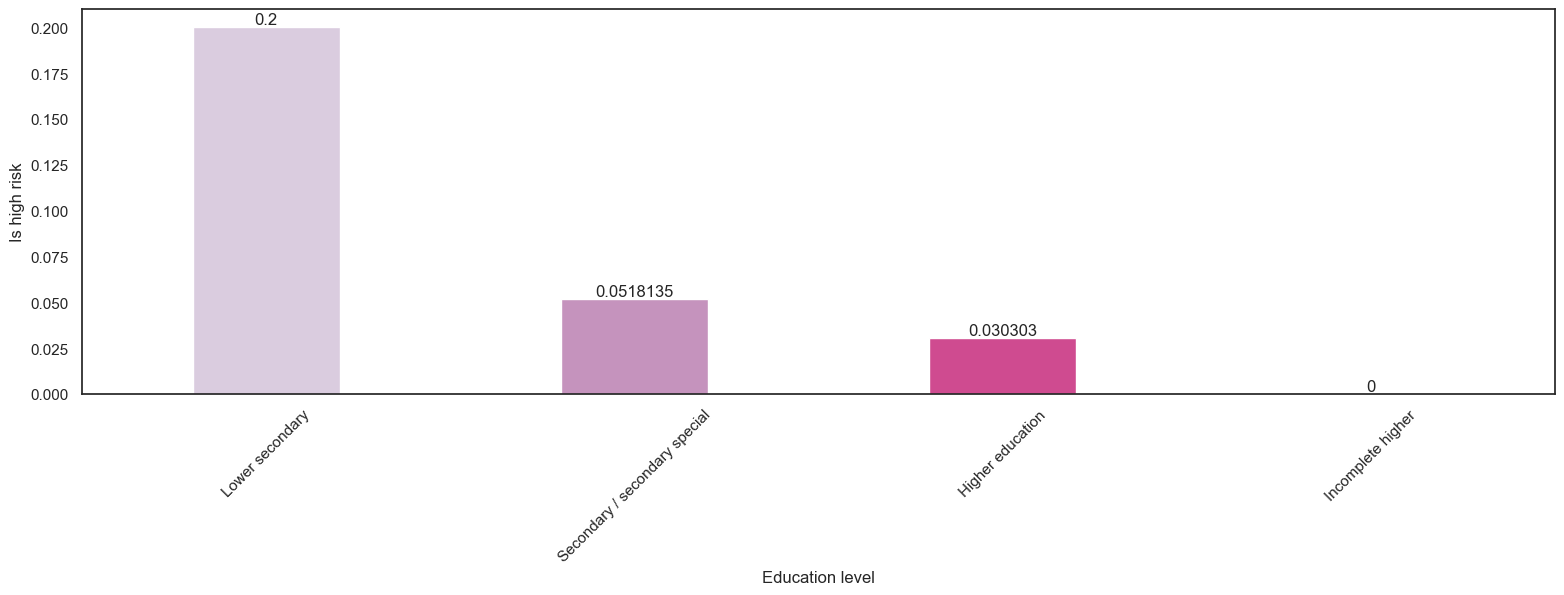

Marital status
Married                 72.0
Single / not married    10.0
Separated                7.0
Civil marriage           6.0
Widow                    6.0
Name: proportion, dtype: float64 0


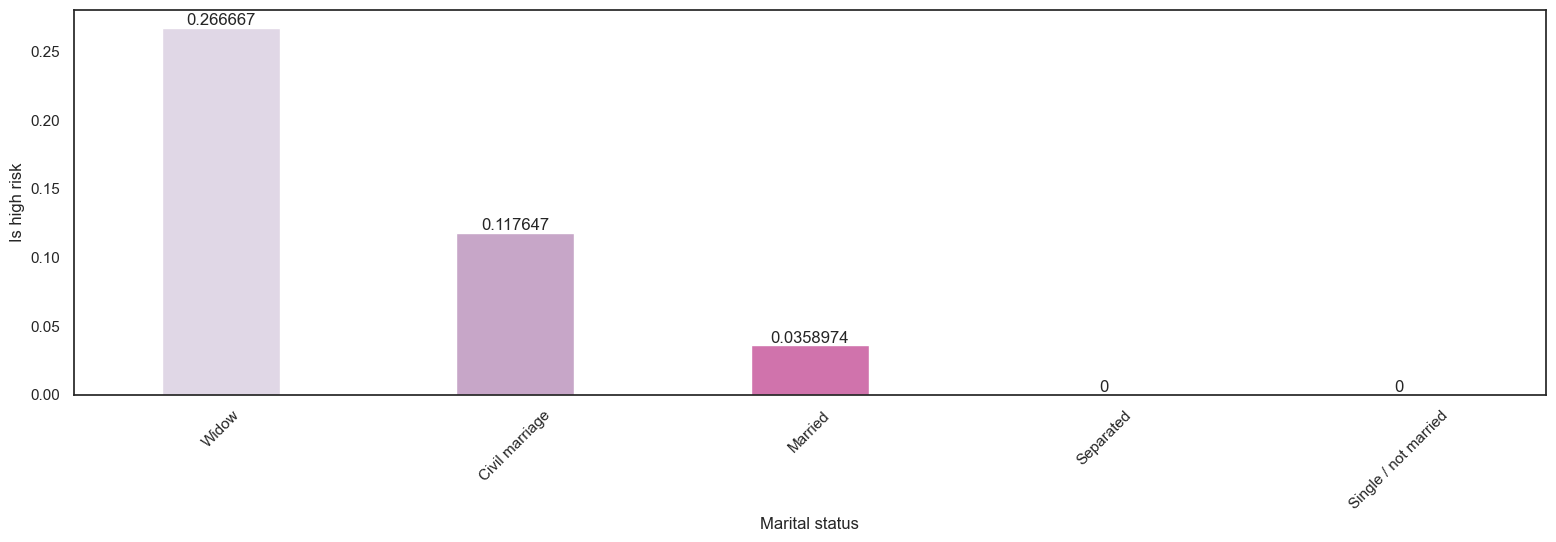

Dwelling
House / apartment      92.0
With parents            3.0
Rented apartment        2.0
Municipal apartment     2.0
Office apartment        1.0
Name: proportion, dtype: float64 0


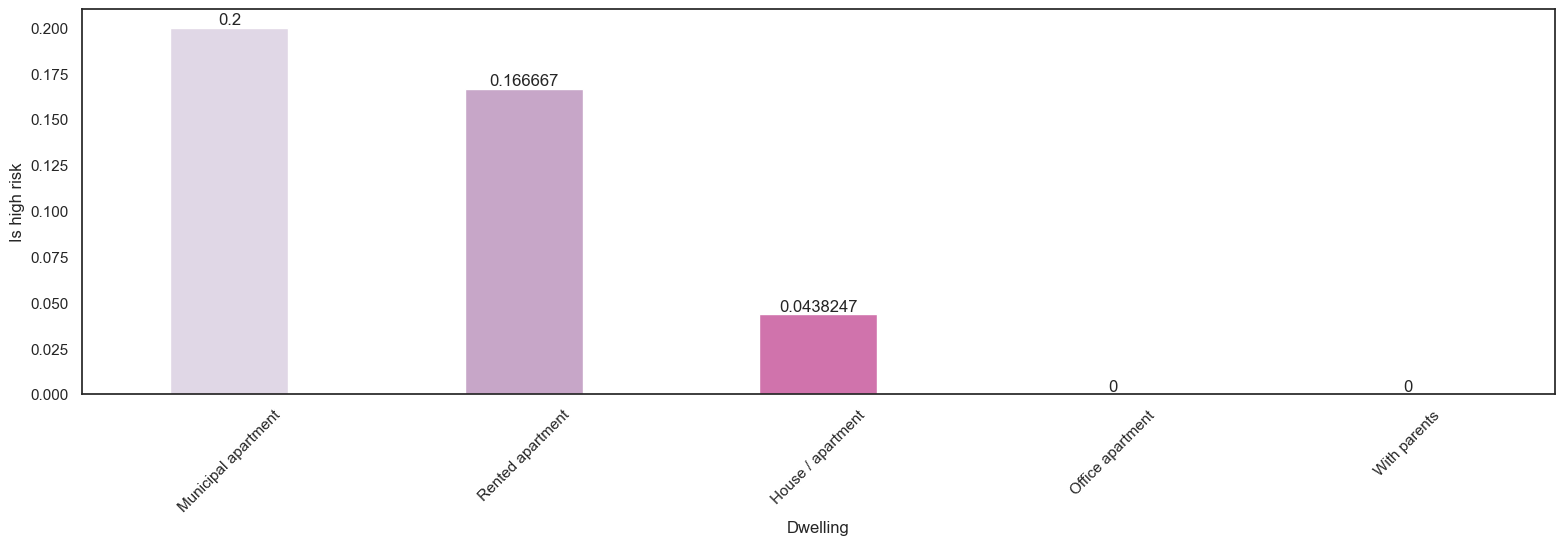

Age
38    6.0
42    5.0
44    4.0
60    4.0
30    4.0
39    4.0
51    4.0
46    4.0
35    3.0
43    3.0
58    3.0
36    3.0
40    3.0
27    3.0
56    3.0
61    3.0
47    3.0
49    3.0
34    3.0
53    2.0
33    2.0
52    2.0
50    2.0
28    2.0
62    2.0
37    2.0
32    2.0
64    2.0
59    2.0
48    2.0
41    1.0
65    1.0
54    1.0
45    1.0
29    1.0
63    1.0
31    1.0
57    1.0
55    1.0
26    0.0
Name: proportion, dtype: float64 0


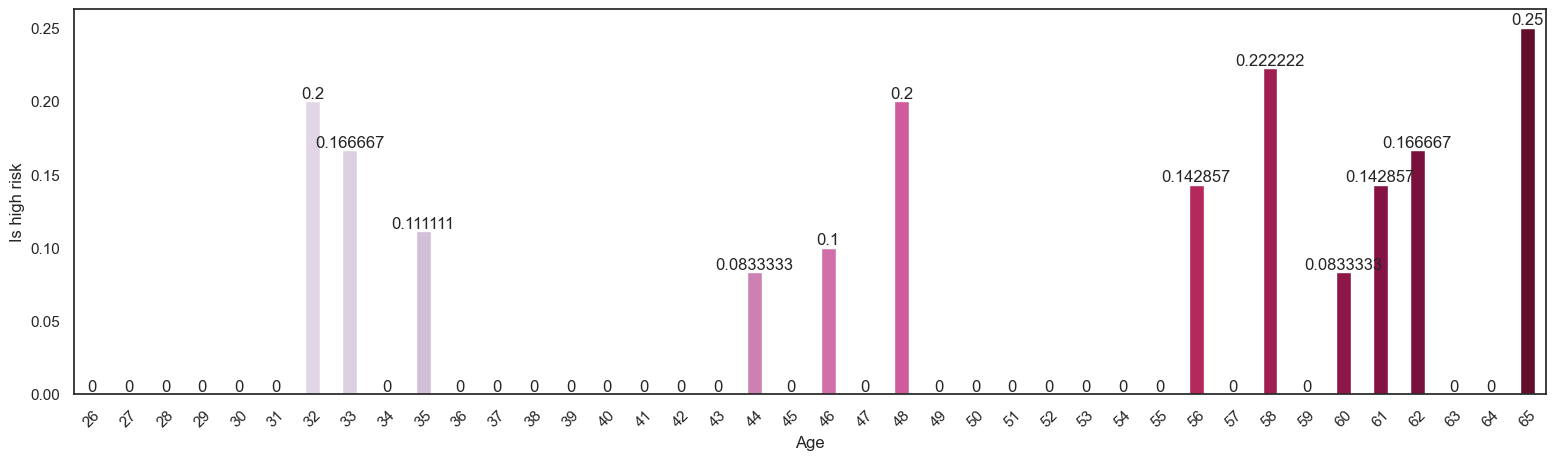

Employment length in year
0.0     17.0
4.8      2.0
0.5      2.0
3.4      2.0
8.5      2.0
9.6      1.0
10.0     1.0
6.4      1.0
7.4      1.0
5.7      1.0
8.0      1.0
9.8      1.0
1.9      1.0
4.0      1.0
8.3      1.0
13.3     1.0
6.0      1.0
0.4      1.0
1.5      1.0
23.3     1.0
7.2      1.0
1.2      1.0
0.9      1.0
1.0      1.0
2.0      1.0
2.7      1.0
7.8      1.0
1.3      1.0
5.1      1.0
10.6     1.0
3.2      1.0
0.8      1.0
5.8      1.0
10.5     1.0
23.7     1.0
1.1      1.0
3.8      1.0
21.2     1.0
2.3      1.0
1.8      1.0
15.7     1.0
1.7      1.0
15.0     1.0
3.9      1.0
16.4     1.0
4.2      1.0
8.2      1.0
2.5      1.0
1.4      1.0
11.8     1.0
14.4     1.0
9.0      1.0
2.4      1.0
5.6      1.0
9.5      1.0
4.9      1.0
8.9      1.0
4.1      1.0
13.2     0.0
17.4     0.0
5.0      0.0
11.5     0.0
2.6      0.0
11.6     0.0
7.5      0.0
6.3      0.0
23.0     0.0
8.7      0.0
11.1     0.0
8.6      0.0
14.9     0.0
6.2      0.0
0.7      0.0
10.8     0.0
15.4     0.0

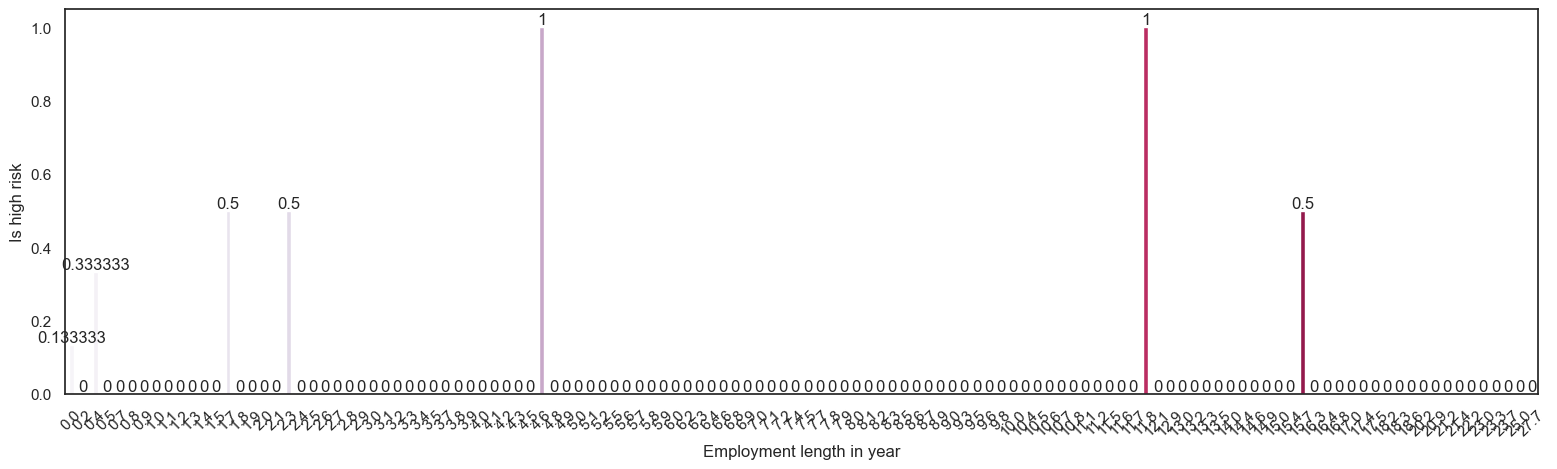

Has a mobile phone
1    100.0
Name: proportion, dtype: float64 0


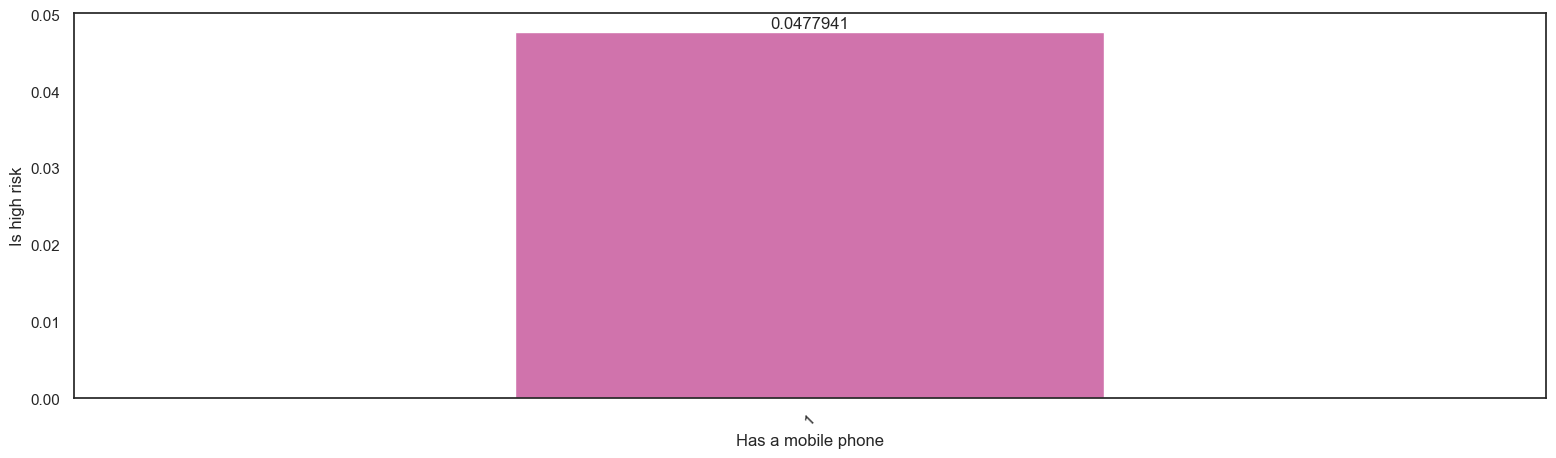

Has a work phone
0    77.0
1    23.0
Name: proportion, dtype: float64 0


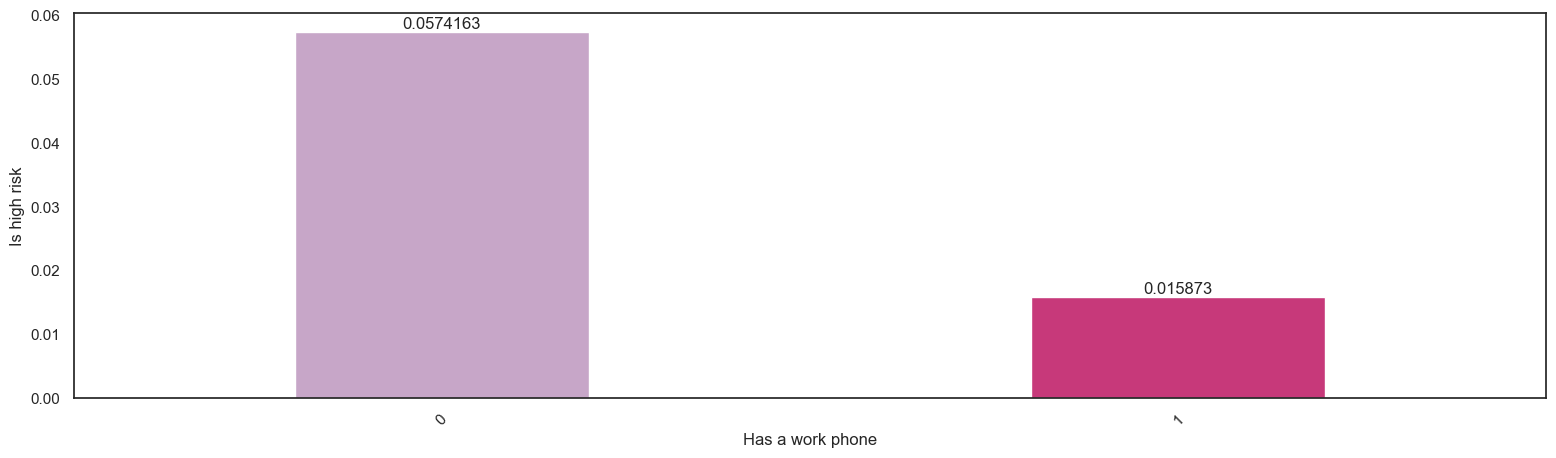

Has a phone
0    68.0
1    32.0
Name: proportion, dtype: float64 0


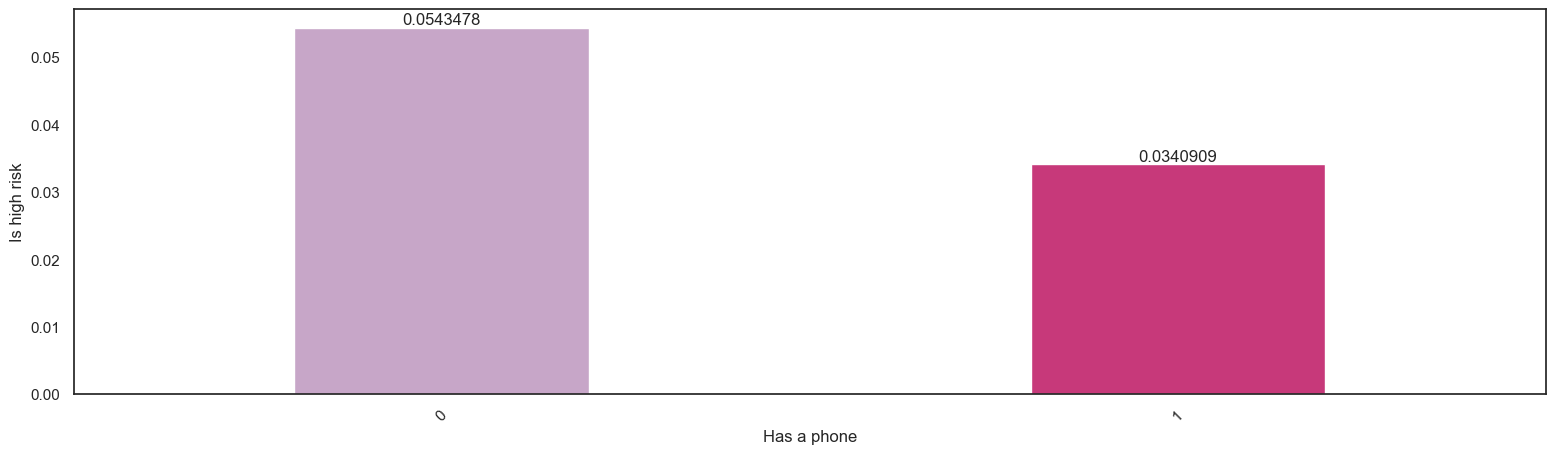

Has an email
0    92.0
1     8.0
Name: proportion, dtype: float64 0


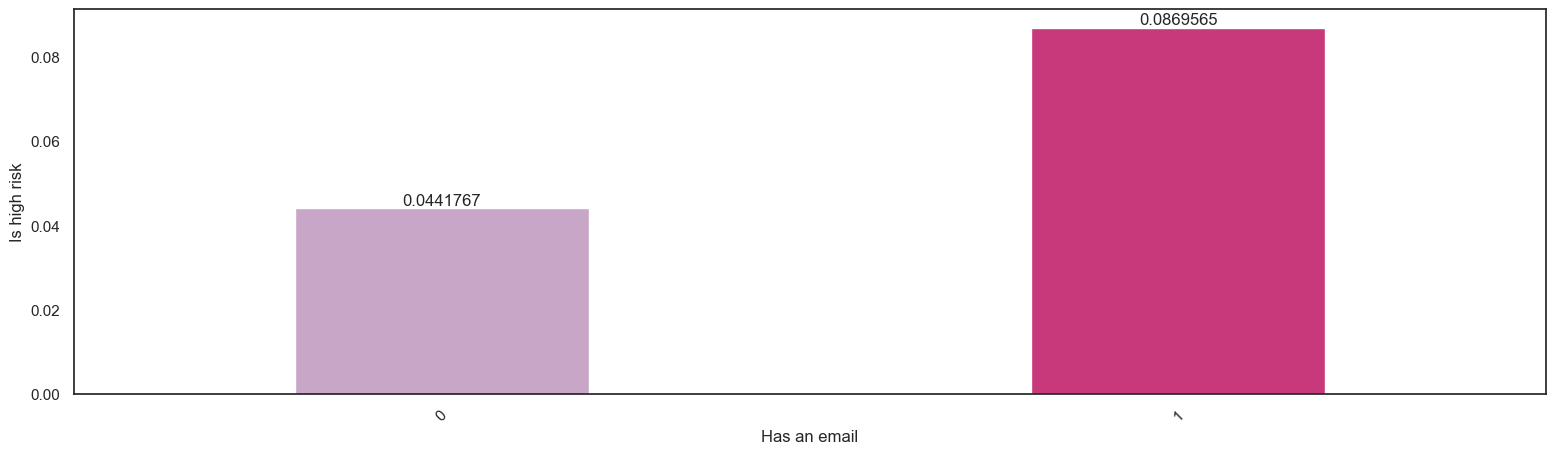

Family member count
2    55.0
1    19.0
3    13.0
4    11.0
5     1.0
Name: proportion, dtype: float64 0


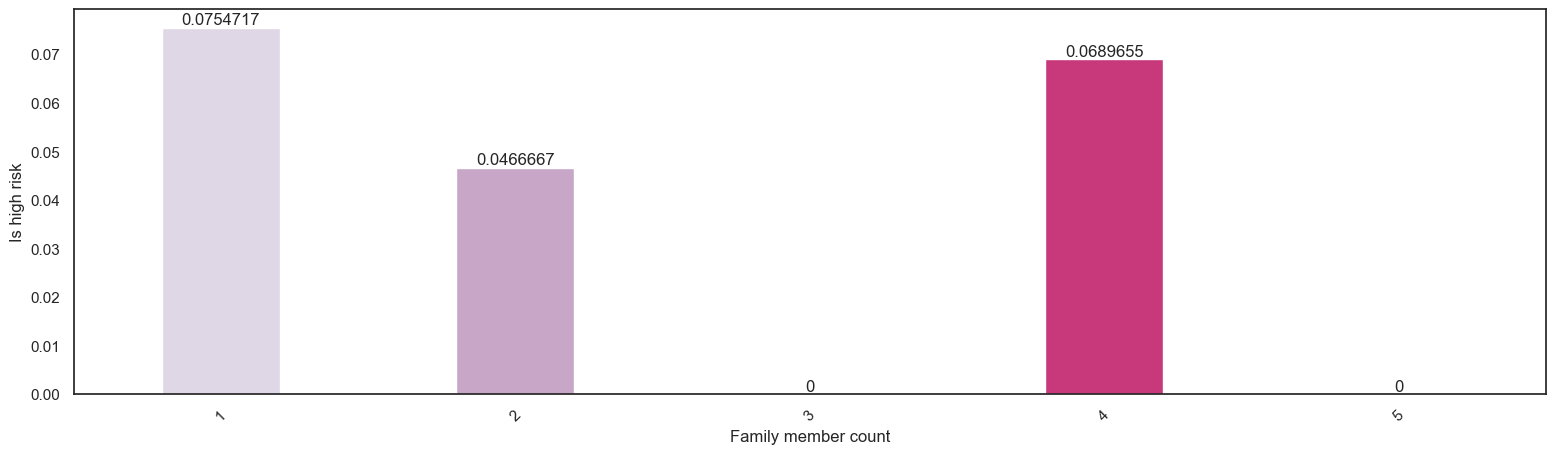

Account age
56    100.0
Name: proportion, dtype: float64 0


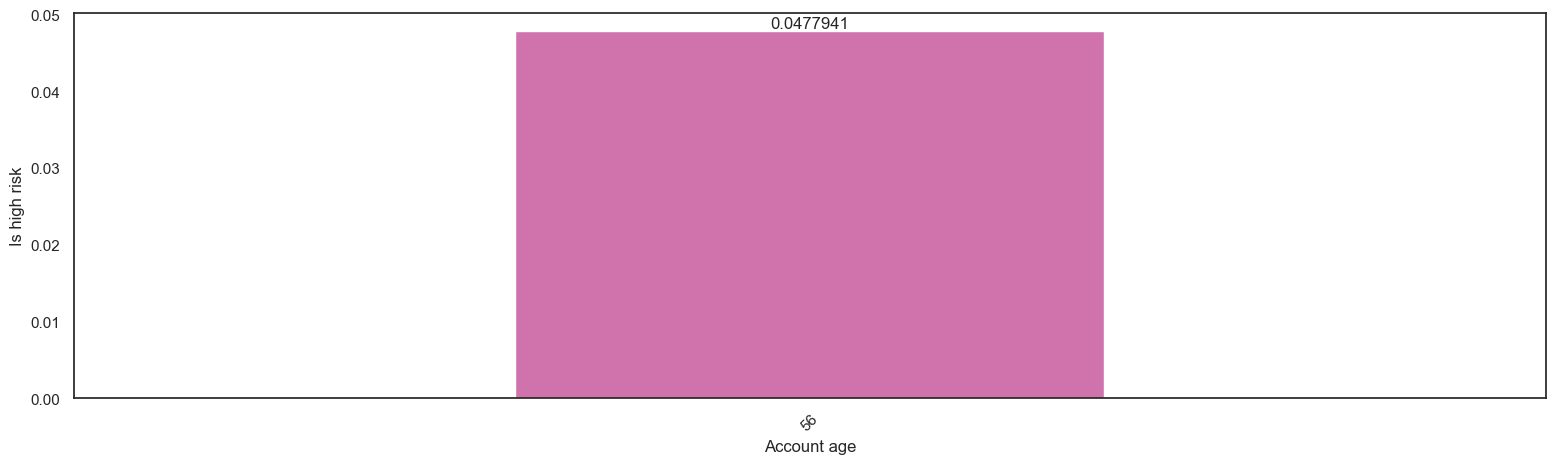

Is high risk
0    95.0
1     5.0
Name: proportion, dtype: float64 0


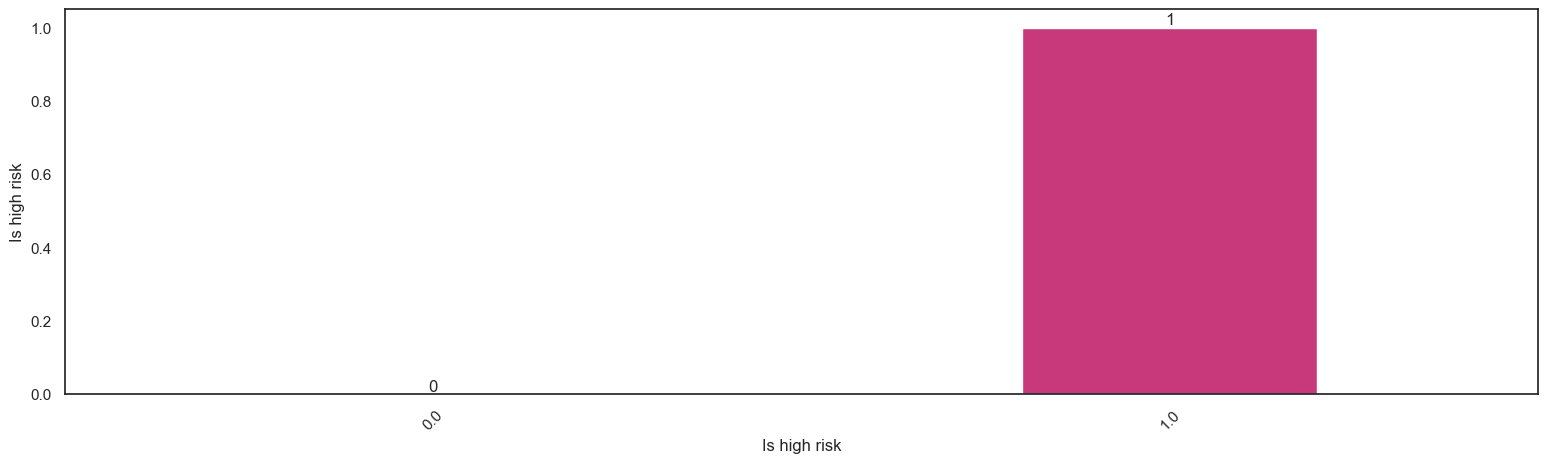

Year
1984    100.0
Name: proportion, dtype: float64 0


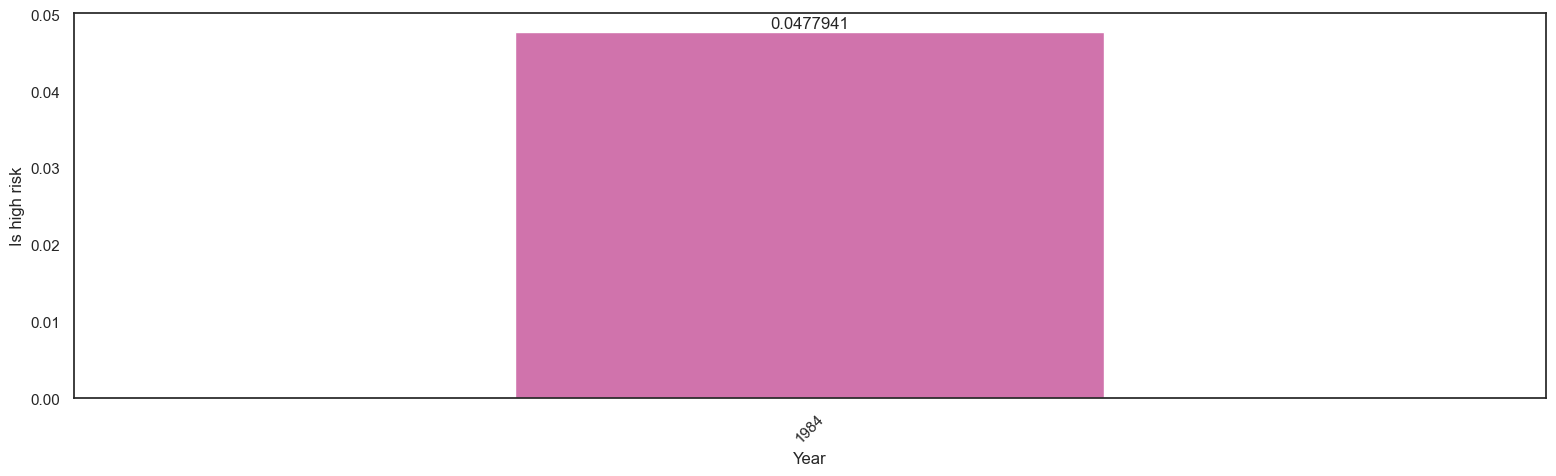

In [242]:
for var in df_1984.columns:
    print(round(df_1984[var].value_counts(normalize=True)*100),0)
    plt.figure(figsize=(19,5))
    a = df_1984.groupby(var,as_index=False)['Is high risk'].mean().sort_values(by='Is high risk',ascending=False)
    b = sb.barplot(x=var,y='Is high risk',data=a,palette='PuRd',width=0.4)
    for i in b.containers:
        b.bar_label(i)
    plt.xticks(rotation=45)
    plt.show()

People of Age above 56 having Account Age = 56 years are at high credit card approval risk, who are mostly from municipal area and lower secondary, widow, pensioner having 2 chindren and no property. 

In this analysis we can notice that when the Income is less than 157500 the risk is high and exactly in 157500 it is showing high risk. Income above 157500 the risk becomes low and almost 0.

In [243]:
risk_df = train_df[train_df['Is high risk']==1]
risk_df.columns

Index(['Gender', 'Has a car', 'Has a property', 'Children count', 'Income',
       'Employment status', 'Education level', 'Marital status', 'Dwelling',
       'Age', 'Employment length in year', 'Has a mobile phone',
       'Has a work phone', 'Has a phone', 'Has an email',
       'Family member count', 'Account age', 'Is high risk', 'Year'],
      dtype='object')

In [244]:
train_df.drop(columns='Year',axis=1,inplace=True)
train_df.shape

(28913, 18)

In [245]:
test_df.shape

(7212, 18)

# Feature Engineering

### Train Feature Analysis

In [246]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28913 entries, 0 to 29163
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     28913 non-null  object 
 1   Has a car                  28913 non-null  object 
 2   Has a property             28913 non-null  object 
 3   Children count             28913 non-null  int64  
 4   Income                     28913 non-null  float64
 5   Employment status          28913 non-null  object 
 6   Education level            28913 non-null  object 
 7   Marital status             28913 non-null  object 
 8   Dwelling                   28913 non-null  object 
 9   Age                        28913 non-null  int32  
 10  Employment length in year  28913 non-null  float64
 11  Has a mobile phone         28913 non-null  int64  
 12  Has a work phone           28913 non-null  int64  
 13  Has a phone                28913 non-null  int64  


In [247]:
for i in train_df:
    print(i)
    print(train_df[i].unique())
    print('_'*70)

Gender
['M' 'F']
______________________________________________________________________
Has a car
['Y' 'N']
______________________________________________________________________
Has a property
['Y' 'N']
______________________________________________________________________
Children count
[0 1 2 3 4]
______________________________________________________________________
Income
[135000.  180000.  360000.  270000.  202500.  306000.  315000.  157500.
 148500.   90000.  130500.   45000.  225000.  391500.  112500.  207000.
 189000.   81000.  126000.  234000.  405000.  128542.5 540000.  450000.
 121500.  216000.  211500.  103500.  247500.  292500.   99000.  265500.
 153000.   72000.  337500.   85500.  238500.   67500.  120150.  171000.
 144000.  139500.  132372.  117000.  310500.  240750.  261000.  193500.
 229500.  215550.  166500.   76500.   78750.  198000.  427500.  382500.
 328500.   54000.  252000.  297000.  176175.  175500.  560250.   73350.
 360450.  274500.   94500.   49500.  279000.

### Test Feature Analysis

In [248]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7212 entries, 0 to 7286
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     7212 non-null   object 
 1   Has a car                  7212 non-null   object 
 2   Has a property             7212 non-null   object 
 3   Children count             7212 non-null   int64  
 4   Income                     7212 non-null   float64
 5   Employment status          7212 non-null   object 
 6   Education level            7212 non-null   object 
 7   Marital status             7212 non-null   object 
 8   Dwelling                   7212 non-null   object 
 9   Age                        7212 non-null   int32  
 10  Employment length in year  7212 non-null   float64
 11  Has a mobile phone         7212 non-null   int64  
 12  Has a work phone           7212 non-null   int64  
 13  Has a phone                7212 non-null   int64  
 1

In [249]:
for i in test_df:
    print(i)
    print(test_df[i].unique())
    print('_'*70)

Gender
['F' 'M']
______________________________________________________________________
Has a car
['N' 'Y']
______________________________________________________________________
Has a property
['Y' 'N']
______________________________________________________________________
Children count
[0 1 2 3 4]
______________________________________________________________________
Income
[202500.  234000.  445500.  225000.   94500.   67500.  189000.  157500.
 292500.  405000.  180000.   90000.  135000.  171000.  252000.  256500.
 315000.  562500.  112500.   99000.  360000.  306000.  126000.  121500.
 198000.  270000.  229500.  450000.  297000.  387000.   72000.  193500.
 140400.  117000.  144000.   95850.  166500.   40500.  103500.  333000.
  76500.  148500.  162000.  153000.  585000.  247500.  382500.   81000.
 207000.  122400.  427500.   78750.  119250.  184500.  337500.  414000.
 130500.  324000.  540000.  123750.   63000.  216000.  261000.  254700.
 211500.   85500.  175500.  274500.  190399.

# ONE-HOT ENCODING

## Orninal Encoding

In [250]:
from pandas.api.types import CategoricalDtype

### Train Ordinal Transformation

In [251]:
train_ordinal_col = ['Education level']

In [252]:
train_df['Education level'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [253]:
train_df['Education level'] = train_df['Education level'].astype(pd.CategoricalDtype(categories=['Lower secondary','Secondary / secondary special','Academic degree','Incomplete higher','Higher education'],ordered=True)).cat.codes

In [254]:
train_df['Education level'].unique()

array([1, 4, 0, 3, 2], dtype=int8)

### Test Ordinal Transformation

In [255]:
test_ordinal_col = ['Education level']

In [256]:
test_df['Education level'].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [257]:
test_df['Education level'] = test_df['Education level'].astype(pd.CategoricalDtype(categories=['Lower secondary','Secondary / secondary special','Academic degree','Incomplete higher','Higher education'],ordered=True)).cat.codes

In [258]:
test_df['Education level'].unique()

array([1, 4, 3, 0, 2], dtype=int8)

## Nominal Encoding

### Train Nominal Analysis

In [259]:
train_df['Has a car'] = train_df['Has a car'].apply(lambda x:0 if x=='N' else 1)

In [260]:
train_df['Has a property'] = train_df['Has a property'].apply(lambda x:0 if x=='N' else 1)

### Test Nominal Analysis

In [261]:
test_df['Has a car'] = test_df['Has a car'].apply(lambda x:0 if x=='N' else 1)

In [262]:
test_df['Has a property'] = test_df['Has a property'].apply(lambda x:0 if x=='N' else 1)

# Dummy Variable Encoding

### Train Dummy Variable Analysis

In [263]:
train_object_features = train_df.select_dtypes(include=object).columns
train_object_features

Index(['Gender', 'Employment status', 'Marital status', 'Dwelling'], dtype='object')

In [264]:
train_df.shape

(28913, 18)

In [265]:
train_df = pd.get_dummies(train_df, columns=train_object_features, prefix=train_object_features,drop_first=True)
train_df.shape

(28913, 28)

In [266]:
train_boolean = ['Employment status_Pensioner','Employment status_State servant','Employment status_Student',
           'Employment status_Working','Marital status_Married','Marital status_Separated',
           'Marital status_Single / not married','Marital status_Widow','Dwelling_House / apartment',
           'Dwelling_Municipal apartment','Dwelling_Office apartment','Dwelling_Rented apartment',
           'Dwelling_With parents','Gender_M']

for var in train_boolean:
    train_df[var] = train_df[var].astype(int)

In [267]:
train_df.head(2)

Has a car  Has a property  Children count    Income  Education level  Age   
0          1               1               0  135000.0                1   44  \
1          1               0               1  135000.0                4   27   

   Employment length in year  Has a mobile phone  Has a work phone   
0                        8.5                   1                 0  \
1                        4.5                   1                 0   

   Has a phone  Has an email  Family member count  Account age  Is high risk   
0            0             0                    2           17             1  \
1            0             0                    2            1             0   

   Gender_M  Employment status_Pensioner  Employment status_State servant   
0         1                            0                                0  \
1         0                            0                                0   

   Employment status_Student  Employment status_Working   
0                          0                          1  \
1                          0                          0   

   Marital status_Married  Marital status_Separated   
0                       1                         0  \
1                       0                         0   

   Marital status_Single / not married  Marital status_Widow   
0                                    0                     0  \
1                                    1                     0   

   Dwelling_House / apartment  Dwelling_Municipal apartment   
0                           0                             0  \
1                           1                             0   

   Dwelling_Office apartment  Dwelling_Rented apartment  Dwelling_With parents  
0                          0                          0                      1  
1                          0                          0                      0

### Test Dummy Variable Analysis

In [268]:
test_object_features = test_df.select_dtypes(include=object).columns
test_object_features

Index(['Gender', 'Employment status', 'Marital status', 'Dwelling'], dtype='object')

In [269]:
test_df.shape

(7212, 18)

In [270]:
test_df = pd.get_dummies(test_df, columns=test_object_features, prefix=test_object_features, drop_first=True)
test_df.shape

(7212, 28)

In [271]:
test_boolean = ['Employment status_Pensioner','Employment status_State servant','Employment status_Student',
           'Employment status_Working','Marital status_Married','Marital status_Separated',
           'Marital status_Single / not married','Marital status_Widow','Dwelling_House / apartment',
           'Dwelling_Municipal apartment','Dwelling_Office apartment','Dwelling_Rented apartment',
           'Dwelling_With parents','Gender_M']

for var in test_boolean:
    test_df[var] = test_df[var].astype(int)

In [272]:
test_df.head(2)

Has a car  Has a property  Children count    Income  Education level  Age   
0          0               1               0  202500.0                1   46  \
2          0               0               0  234000.0                4   60   

   Employment length in year  Has a mobile phone  Has a work phone   
0                        4.6                   1                 0  \
2                       14.3                   1                 0   

   Has a phone  Has an email  Family member count  Account age  Is high risk   
0            0             0                    1            6             1  \
2            0             1                    2           52             0   

   Gender_M  Employment status_Pensioner  Employment status_State servant   
0         0                            0                                1  \
2         0                            0                                1   

   Employment status_Student  Employment status_Working   
0                          0                          0  \
2                          0                          0   

   Marital status_Married  Marital status_Separated   
0                       0                         1  \
2                       0                         0   

   Marital status_Single / not married  Marital status_Widow   
0                                    0                     0  \
2                                    0                     0   

   Dwelling_House / apartment  Dwelling_Municipal apartment   
0                           1                             0  \
2                           1                             0   

   Dwelling_Office apartment  Dwelling_Rented apartment  Dwelling_With parents  
0                          0                          0                      0  
2                          0                          0                      0

# TRAIN TEST SPLIT

In [273]:
X_train = train_df.drop(columns='Is high risk',axis=1)
y_train = train_df['Is high risk']

X_test  = test_df.drop(columns='Is high risk',axis=1)
y_test  = test_df['Is high risk']

print('X_train : ', X_train.shape)
print('X_test : ', X_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

X_train :  (28913, 27)
X_test :  (7212, 27)
y_train :  (28913,)
y_test :  (7212,)


# Correlation Test

<Figure size 2500x2500 with 0 Axes>

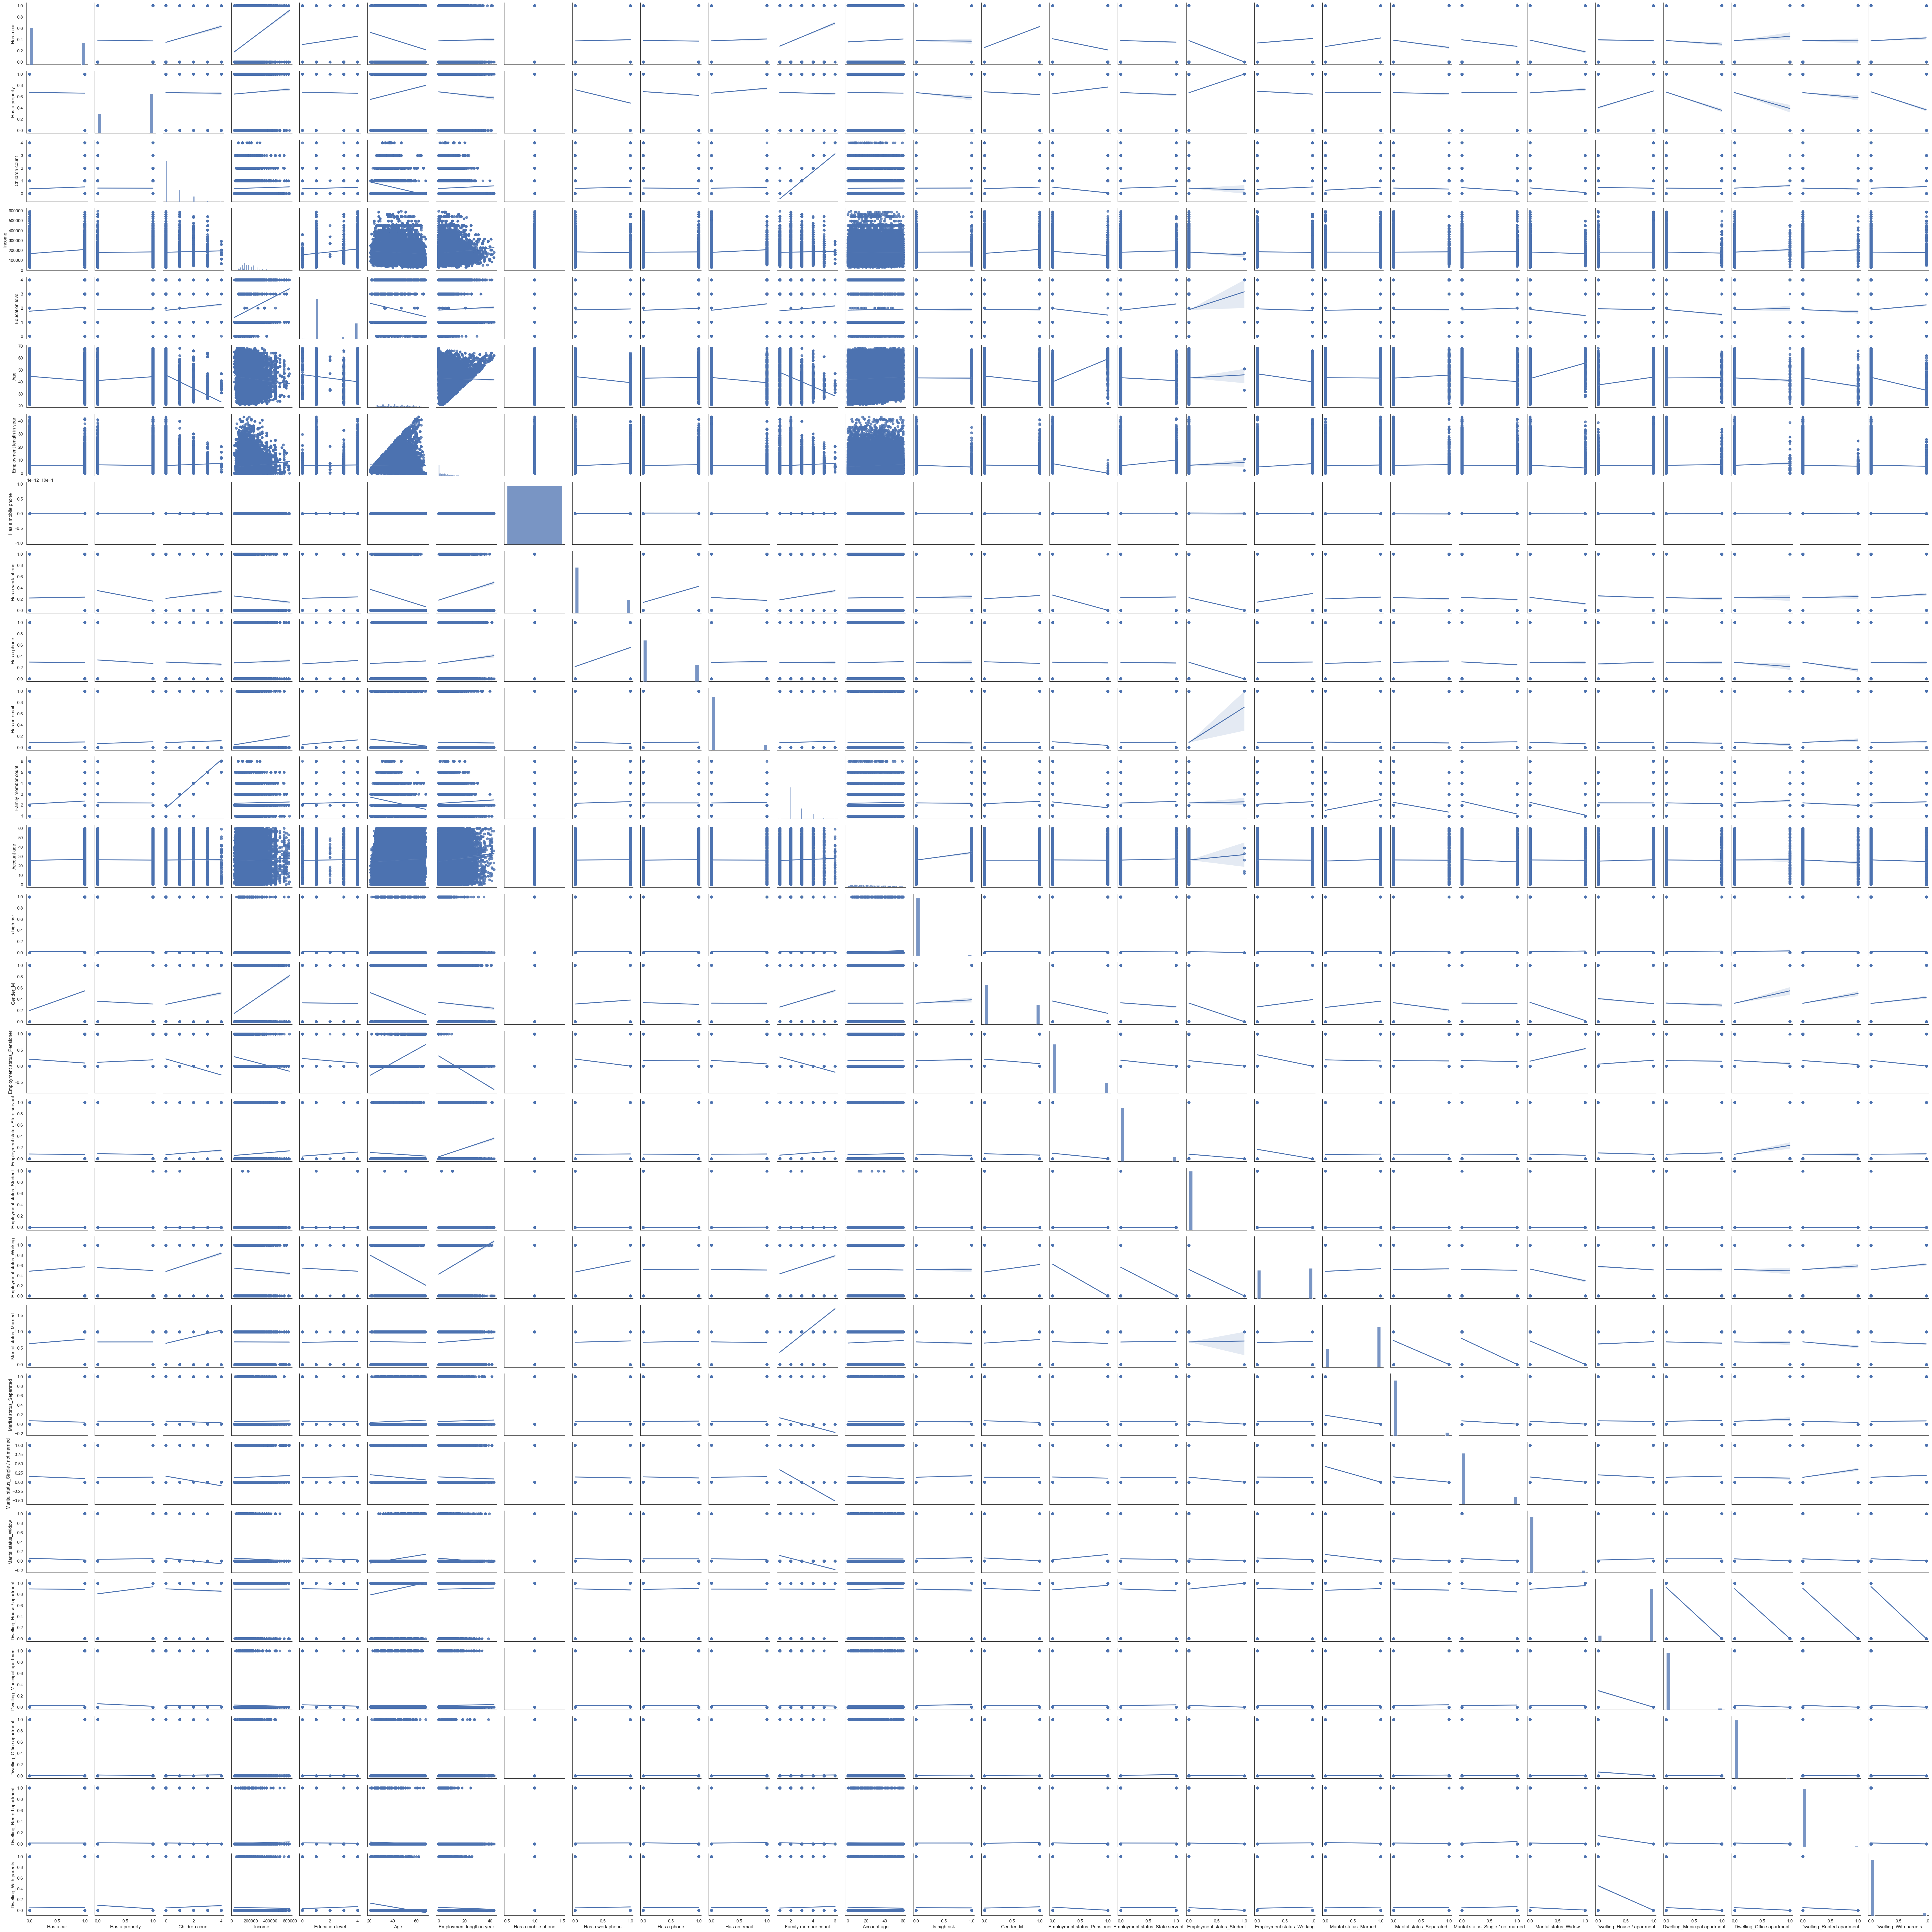

In [290]:
plt.figure(figsize=(25,25))
sb.pairplot(train_df, kind='reg')
plt.show()

<Axes: >

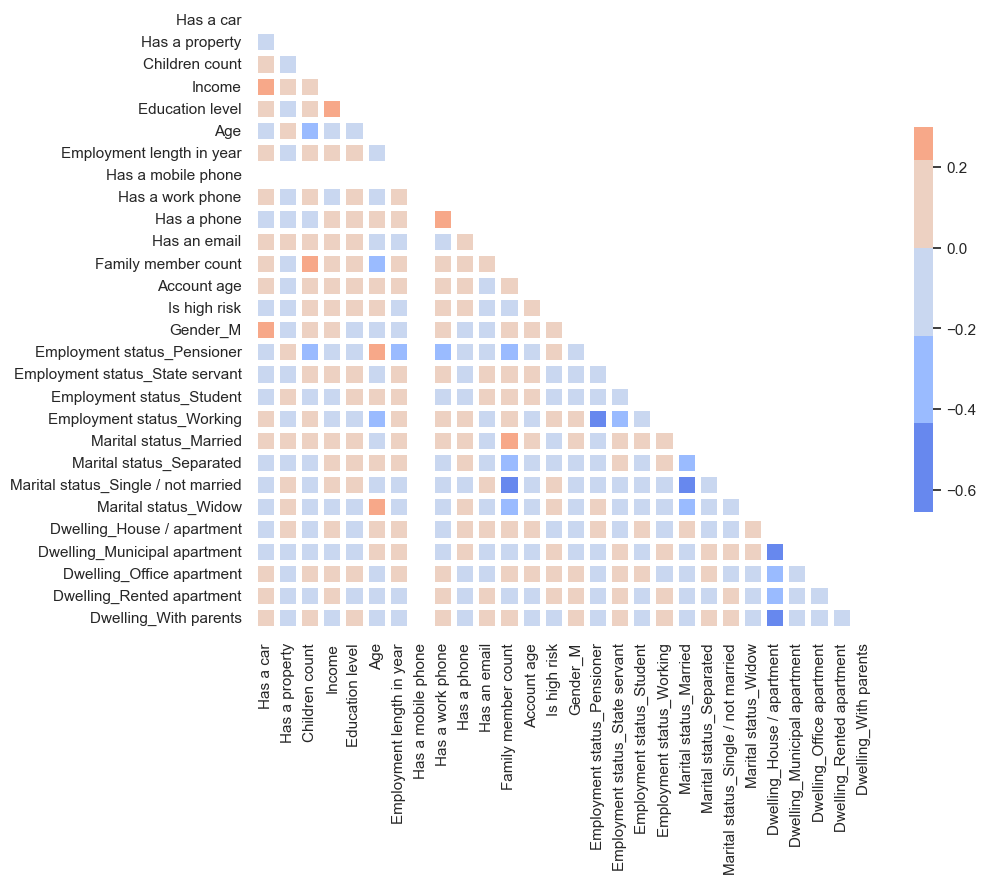

In [274]:
sb.set_theme(style="white")
corr = train_df.corr()
mask = np.triu(train_df.corr())
f, ax = plt.subplots(figsize=(10, 10))
cmap = sb.color_palette("coolwarm")

sb.heatmap(corr, 
            mask=mask, 
            cmap=cmap, 
            vmax=.3, 
            center=0,
            square=True, 
            linewidths=3, 
            cbar_kws={"shrink": .5}
           )

Correration is between 0.2 to 0.6 

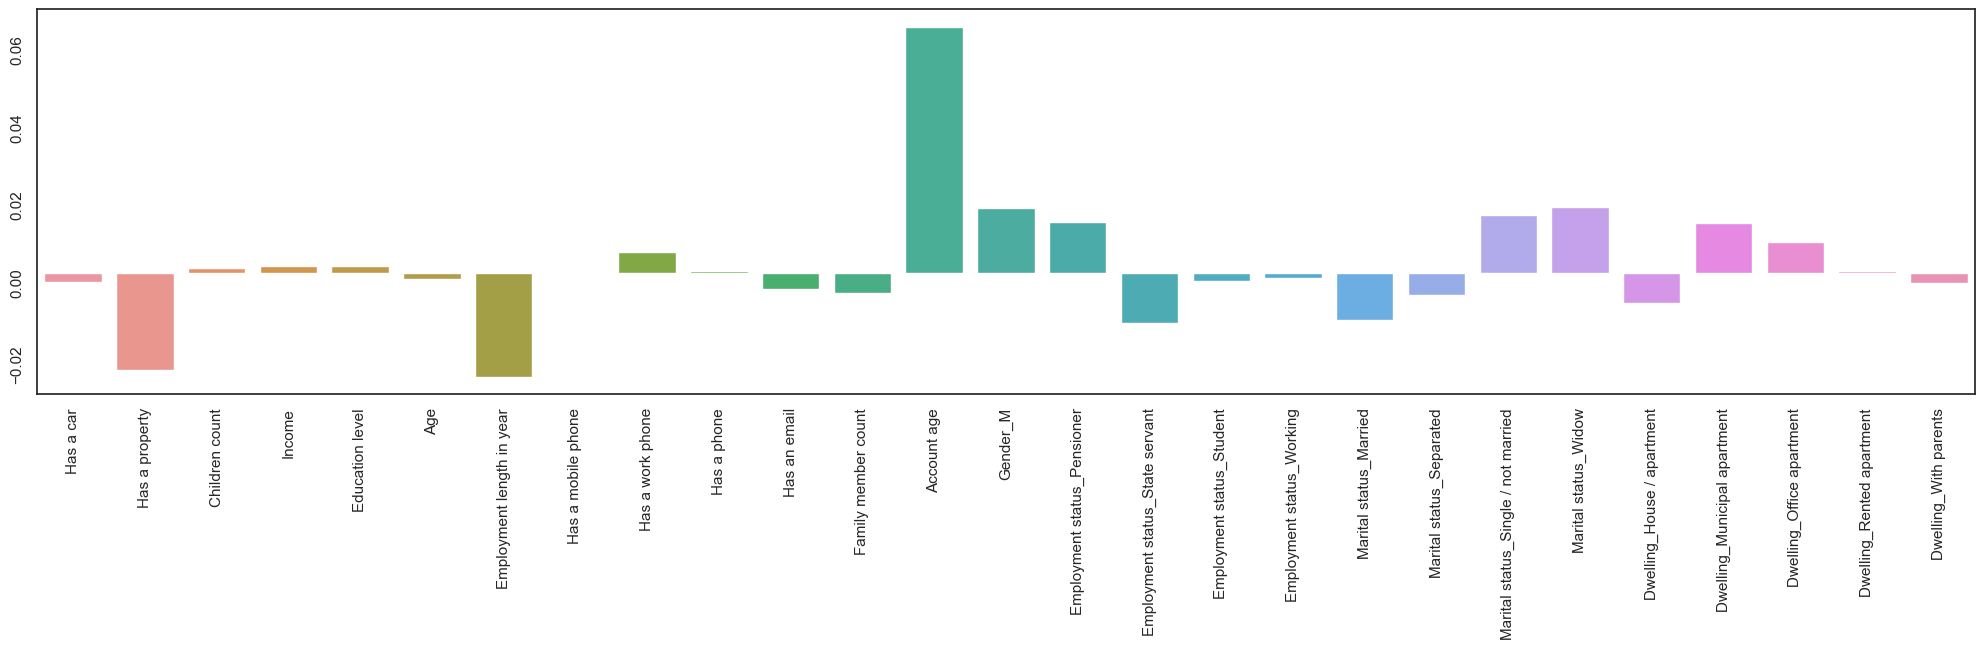

In [275]:
plt.figure(figsize=(25,5))
ax = sb.barplot(x=X_train.corrwith(y_train).index, y=X_train.corrwith(y_train))
ax.tick_params(labelrotation = 90)
plt.show()

Account Age, Gender- Male, Pensioner Employment, Marital status- Single & Widow, Dwelling municipal-Apartment, Dwelling office-Apartment have most positive correlation. And Has a property, Employment length in year, Employment Status- State Servant, Marital status- Married have less correlation.

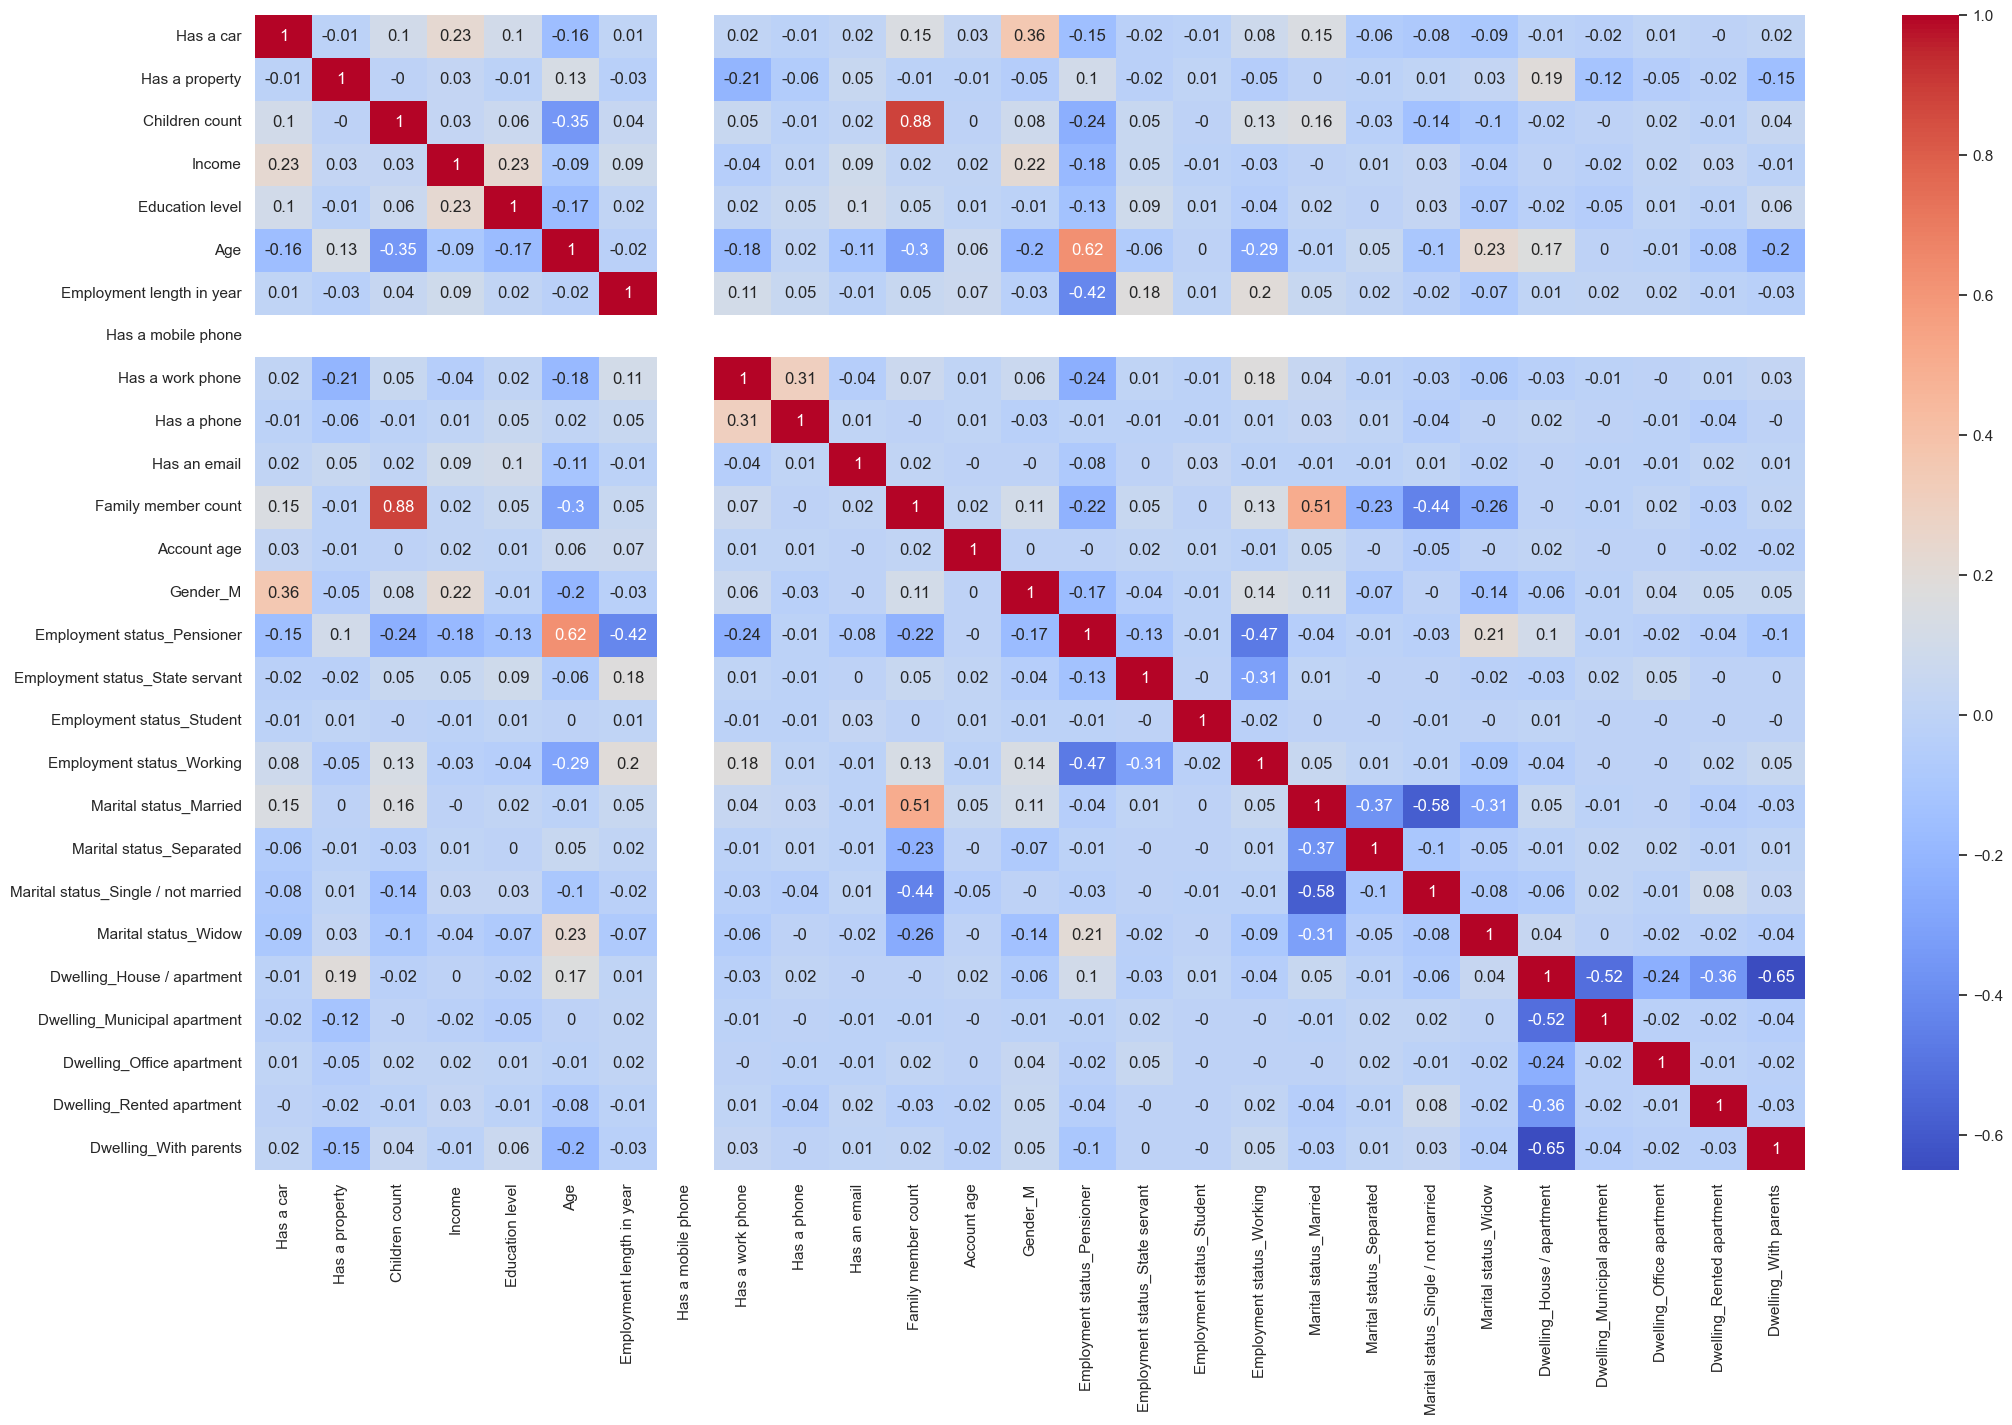

In [276]:
plt.figure(figsize=(25,15))
sb.heatmap(round(X_train.corr(),2),cmap='coolwarm',annot=True)
plt.show()

In [277]:
train_df[train_df.columns[1:]].corr()['Is high risk'][:].sort_values(ascending=False).to_frame()

Is high risk
Is high risk                             1.000000
Account age                              0.063436
Marital status_Widow                     0.016879
Gender_M                                 0.016613
Marital status_Single / not married      0.014818
Employment status_Pensioner              0.013061
Dwelling_Municipal apartment             0.012842
Dwelling_Office apartment                0.007971
Has a work phone                         0.005257
Education level                          0.001676
Income                                   0.001666
Children count                           0.001278
Dwelling_Rented apartment                0.000460
Has a phone                              0.000327
Employment status_Working               -0.001449
Age                                     -0.001699
Employment status_Student               -0.002060
Dwelling_With parents                   -0.002699
Has an email                            -0.004139
Family member count                     -0.005176
Marital status_Separated                -0.005717
Dwelling_House / apartment              -0.007712
Marital status_Married                  -0.012109
Employment status_State servant         -0.012954
Has a property                          -0.025075
Employment length in year               -0.026822
Has a mobile phone                            NaN

No Correlation with has a mobile phone feature

## Pearson Correlation Test

In [278]:
from scipy.stats import pearsonr

target = 'Is high risk'
corelation_with_target = {}

for col in train_df:
    if target != col:
        corelation_with_target[col] = round(pearsonr(train_df[col],train_df[target])[0],2)
        
corelation_with_target

{'Has a car': -0.0,
 'Has a property': -0.03,
 'Children count': 0.0,
 'Income': 0.0,
 'Education level': 0.0,
 'Age': -0.0,
 'Employment length in year': -0.03,
 'Has a mobile phone': nan,
 'Has a work phone': 0.01,
 'Has a phone': 0.0,
 'Has an email': -0.0,
 'Family member count': -0.01,
 'Account age': 0.06,
 'Gender_M': 0.02,
 'Employment status_Pensioner': 0.01,
 'Employment status_State servant': -0.01,
 'Employment status_Student': -0.0,
 'Employment status_Working': -0.0,
 'Marital status_Married': -0.01,
 'Marital status_Separated': -0.01,
 'Marital status_Single / not married': 0.01,
 'Marital status_Widow': 0.02,
 'Dwelling_House / apartment': -0.01,
 'Dwelling_Municipal apartment': 0.01,
 'Dwelling_Office apartment': 0.01,
 'Dwelling_Rented apartment': 0.0,
 'Dwelling_With parents': -0.0}

In [279]:
zero_correlation_col = [var for var in corelation_with_target if (corelation_with_target[var] < 0.01) & (corelation_with_target[var] > -0.03)]

print(len(zero_correlation_col))
zero_correlation_col

16


['Has a car',
 'Children count',
 'Income',
 'Education level',
 'Age',
 'Has a phone',
 'Has an email',
 'Family member count',
 'Employment status_State servant',
 'Employment status_Student',
 'Employment status_Working',
 'Marital status_Married',
 'Marital status_Separated',
 'Dwelling_House / apartment',
 'Dwelling_Rented apartment',
 'Dwelling_With parents']

In [280]:
X_train= X_train.drop(columns=zero_correlation_col,axis=1)
X_test=X_test.drop(columns=zero_correlation_col,axis=1)

In [281]:
#Has a mobile phone
X_train= X_train.drop(columns=['Has a mobile phone'],axis=1)
X_test=X_test.drop(columns=['Has a mobile phone'],axis=1)

In [282]:
X_train.shape

(28913, 10)

In [283]:
X_test.shape

(7212, 10)

Text(0.5, 1.0, 'Account age vs. Is high risk')

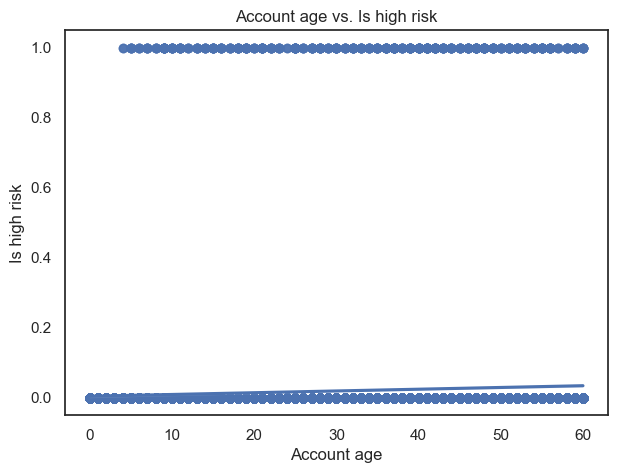

In [284]:
plt.figure(figsize=(7,5))
sb.regplot(x=train_df["Account age"], y=train_df["Is high risk"])
plt.title('Account age vs. Is high risk')

## 85% Correlation Test

In [285]:
def ninty_correlation(data, threshold):
    corr3 = set()
    corr_matrix = X_train.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                corr3.add(corr_matrix.columns[i])
    return corr3     


In [286]:
overall_corr = ninty_correlation(X_train, 0.85)
overall_corr

set()

In [287]:
X_train.columns

Index(['Has a property', 'Employment length in year', 'Has a work phone',
       'Account age', 'Gender_M', 'Employment status_Pensioner',
       'Marital status_Single / not married', 'Marital status_Widow',
       'Dwelling_Municipal apartment', 'Dwelling_Office apartment'],
      dtype='object')

In [288]:
X_test.columns

Index(['Has a property', 'Employment length in year', 'Has a work phone',
       'Account age', 'Gender_M', 'Employment status_Pensioner',
       'Marital status_Single / not married', 'Marital status_Widow',
       'Dwelling_Municipal apartment', 'Dwelling_Office apartment'],
      dtype='object')

# Feature Scaling

In [135]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Machine Learning Model Development

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.gaussian_process import GaussianProcessClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

In [137]:
log = LogisticRegression()
rg  = RidgeClassifier()
sgd = SGDClassifier()
svc = SVC()
dt  = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf  = RandomForestClassifier()
bag = BaggingClassifier()
gb  = GradientBoostingClassifier()
gp  = GaussianProcessClassifier()
xg  = XGBClassifier()
xgbr= XGBRFClassifier()

In [138]:
models = {
    
    'a' : ['LogisticRegression',log],
    'b' : ['RidgeClassifier',rg],
    'c' : ['SGDClassifier',sgd],
    'd' : ['SVC',svc],
    'e' : ['DecisionTreeClassifier',dt],
    'f' : ['KNeighborsClassifier',knn],
    'g' : ['RandomForestClassifier',rf],
    'h' : ['BaggingClassifier',bag],
    'i' : ['GradientBoostingClassifier',gb],
    #'j' : ['GaussianProcessClassifier',gp],
    'k' : ['XGBClassifier',xg],
    'l' : ['XGBRFClassifier',xgbr]
    
}

# Cross Validation

In [139]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, make_scorer

def test_model(each_model, X_train= X_train, y_train= y_train):
    
    cross_valid = KFold(n_splits=5, shuffle=True, random_state=5000)
    r2 = make_scorer(r2_score)
    
    each_r2_val_score = cross_val_score(each_model, X_train, y_train, cv=cross_valid)
    score = [each_r2_val_score.mean()]
    
    return score

In [140]:
model_score = []

for var in models:
    print('Training Model : ', models[var][0])             #[0] = model name
    score = test_model(models[var][1], X_train, y_train)   #[1] = model score
    
    print('Score          : ',score[0])                     #[0] = removing third bracket
    model_score.append([models[var], score])
    print('\n')

Training Model :  LogisticRegression
Score          :  0.982775986797501


Training Model :  RidgeClassifier
Score          :  0.982775986797501


Training Model :  SGDClassifier
Score          :  0.982775986797501


Training Model :  SVC
Score          :  0.982775986797501


Training Model :  DecisionTreeClassifier
Score          :  0.9714315740628148


Training Model :  KNeighborsClassifier
Score          :  0.9826030482240405


Training Model :  RandomForestClassifier
Score          :  0.9800781976873376


Training Model :  BaggingClassifier
Score          :  0.9798707108760496


Training Model :  GradientBoostingClassifier
Score          :  0.9830872499118201


Training Model :  XGBClassifier
Score          :  0.9827759808161579


Training Model :  XGBRFClassifier
Score          :  0.982775986797501




# Hyper Parameter Tuning

## Decision Tree Analysis 

In [291]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import RandomizedSearchCV

import time
start_time = time.time()

params = { 
         }


rs_cv = RandomizedSearchCV(estimator=DecisionTreeClassifier(), 
                           param_distributions=params, 
                           n_iter=100,
                           cv=5,
                           verbose=1,
                           random_state=5000)

rs_cv.fit(X_train,y_train)
y_pred_rs_cv = rs_cv.predict(X_test)


print("\nTime to execute: ", time.time()-start_time)
print("\nBest Parameters : ", rs_cv.best_params_)

score = rs_cv.best_score_
print("\nBest Score : ", score*100)

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Time to execute:  0.40097904205322266

Best Parameters :  {}

Best Score :  80.88927917817304


### Train Decision Tree Model

In [143]:
dtc = DecisionTreeClassifier(
)


dtc.fit(X_train,y_train)
dtc_reg = dtc.score(X_test,y_test)

print(dtc_reg*100)

97.10205213533001


### Test Dicision Tree

In [144]:
dtc_reg = dtc.predict(X_test)
dtc_reg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### CONFUSION MATRIX - Decision Tree

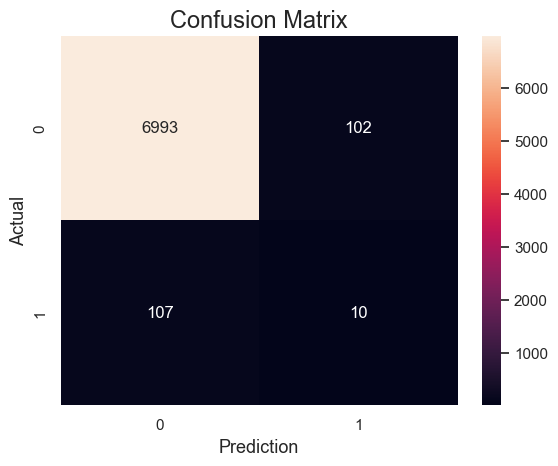

Accuracy  : 0.971
Precision : 0.089
Recall    : 0.085
F2_score  : 0.086


TP :  10
TN :  6993
FP :  102
FN :  107


Needs to reduce FP for increasing Precision


In [145]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import confusion_matrix

y_pred = dtc.predict(X_test)

con_mat = confusion_matrix(y_test,y_pred)

sb.heatmap(con_mat,
            annot=True,
            fmt='g',
            )
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy  :", accuracy)
precision = round(precision_score(y_test, y_pred),3)
print("Precision :", precision)
recall = round(recall_score(y_test, y_pred),3)
print("Recall    :", recall)
fbeta_score = round(fbeta_score(y_test, y_pred,beta=2),3)
print("F2_score  :", fbeta_score)

print('\n')
print("TP : ", con_mat[1,1])
print("TN : ", con_mat[0,0])
print("FP : ", con_mat[0,1])
print("FN : ", con_mat[1,0])
print('\n')
print("Needs to reduce FP for increasing Precision")


False Positive is so high(104) in Decision Tree Classifier Model. That's why Precision becomes lower. Here Precision is more important than Recall. So we need to try another algorithm for getting best precision score by reducing False Positive value. 

## Gradiant Boosting Classifier Analysis

In [296]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import RandomizedSearchCV

import time
start_time = time.time()

params = {  
         }


rs_cv = RandomizedSearchCV(estimator=GradientBoostingClassifier(), 
                           param_distributions=params, 
                           n_iter=100,
                           cv=5,
                           verbose=0,
                           random_state=5000)

rs_cv.fit(X_train,y_train)
y_pred_rs_cv = rs_cv.predict(X_test)


print("\nTime to execute: ", time.time()-start_time)
print("\nBest Parameters : ", rs_cv.best_params_)

score = rs_cv.best_score_
print("\nBest Score : ", score*100)


Time to execute:  10.690279722213745

Best Parameters :  {}

Best Score :  81.99256662603143


In [293]:
gb = GradientBoostingClassifier(
)


gb.fit(X_train,y_train)
gb_reg = gb.score(X_test,y_test)

print(gb_reg*100)

98.41930116472545


In [294]:
gb_reg = gb.predict(X_test)
gb_reg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

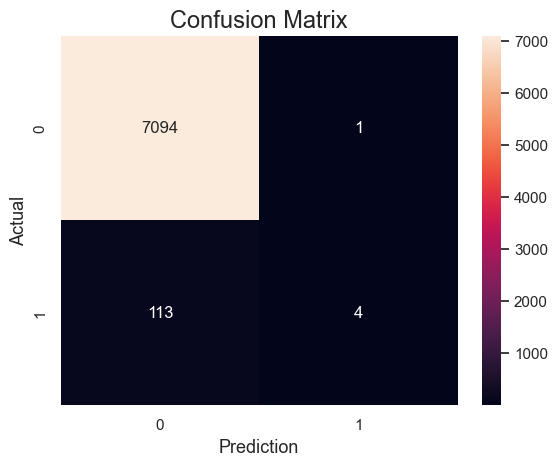

Accuracy  : 0.984
Precision : 0.8
Recall    : 0.034
F2_score  : 0.146


TP :  4
TN :  7094
FP :  1
FN :  113


In [295]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import confusion_matrix

y_pred = gb.predict(X_test)

con_mat = confusion_matrix(y_test,y_pred)

sb.heatmap(con_mat,
            annot=True,
            fmt='g',
            )
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Prediction',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


# Finding precision and recall
accuracy = round(accuracy_score(y_test, y_pred),3)
print("Accuracy  :", accuracy)
precision = round(precision_score(y_test, y_pred),3)
print("Precision :", precision)
recall = round(recall_score(y_test, y_pred),3)
print("Recall    :", recall)
fbeta_score = round(fbeta_score(y_test, y_pred,beta=0.5),3)
print("F2_score  :", fbeta_score)

print('\n')
print("TP : ", con_mat[1,1])
print("TN : ", con_mat[0,0])
print("FP : ", con_mat[0,1])
print("FN : ", con_mat[1,0])

# SAVE THE MODEL

In [150]:
from joblib import Parallel, delayed
import joblib
  
#save model
joblib.dump(gb, 'credit_card_approval.pkl')
  
# Load the model from the file
gradient_boosting_joblib = joblib.load('credit_card_approval.pkl')
  
# Use the loaded model to make predictions
gradient_boosting_joblib.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)